## **Data Collecting**

In [6]:
!pip install pmdarima --q # untuk arima otomatis
!pip install prophet --q # untuk fbprophet
!pip install streamlit # untuk install streamlit

In [7]:
# Import library yang diperlukan
import streamlit as st
import os  # Library untuk berinteraksi dengan sistem operasi
import pandas as pd  # Library untuk manipulasi dan analisis data
import numpy as np  # Library untuk komputasi numerik
import seaborn as sns  # Import library seaborn untuk visualisasi
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import library preprocessing
from sklearn.model_selection import train_test_split  # Import library untuk pemisahan data
import matplotlib.pyplot as plt  # Library untuk membuat plot dan visualisasi data
from datetime import datetime, date  # Library untuk bekerja dengan data tanggal dan waktu
from statsmodels.tsa.seasonal import seasonal_decompose  # Library untuk dekomposisi musiman pada data deret waktu
from statsmodels.tsa.stattools import adfuller  # Library untuk uji Augmented Dickey-Fuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # Library untuk plot ACF dan PACF
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing  # Library untuk model peramalan eksponensial
from statsmodels.tsa.arima.model import ARIMA  # Library untuk model ARIMA
from pmdarima.arima import auto_arima  # Library untuk menentukan model ARIMA secara otomatis
from statsmodels.tsa.statespace.sarimax import SARIMAX  # Library untuk model SARIMA
from prophet import Prophet  # Library untuk model peramalan time series yang disebut Prophet
from prophet.plot import plot_plotly, plot_components_plotly  # Library untuk membuat plot interaktif menggunakan plotly
from tensorflow.keras.models import Sequential  # Library untuk membuat model sequential di TensorFlow
from tensorflow.keras.layers import *  # Import semua layer yang mungkin diperlukan dalam jaringan saraf
from tensorflow.keras.callbacks import ModelCheckpoint  # Library untuk menyimpan model selama pelatihan
from tensorflow.keras.losses import MeanSquaredError  # Library untuk menghitung nilai kerugian dengan Mean Squared Error
from tensorflow.keras.metrics import RootMeanSquaredError  # Library untuk mengukur kinerja model dengan Root Mean Squared Error
from tensorflow.keras.optimizers import Adam  # Optimizer Adam untuk mengoptimalkan model jaringan saraf
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error  # Library untuk menghitung metrik evaluasi seperti Mean Squared Error dan Mean Absolute Percentage Error
import warnings  # Library untuk mengelola peringatan
warnings.filterwarnings("ignore")  # Mengabaikan semua peringatan yang muncul selama runtime

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
# Baca dataset
data1 = pd.read_csv('/content/drive/MyDrive/Dataset/ispu_dki1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Dataset/ispu_dki2.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Dataset/ispu_dki3.csv')
data4 = pd.read_csv('/content/drive/MyDrive/Dataset/ispu_dki4.csv')
data5 = pd.read_csv('/content/drive/MyDrive/Dataset/ispu_dki5.csv')
data6 = pd.read_csv('/content/drive/MyDrive/Dataset/ispu_20.csv')

# Gabungkan data secara vertikal (tambahkan baris)
data_AQ = pd.concat([data1, data2, data3, data4, data5, data6], ignore_index=True)

# Simpan data yang telah digabungkan ke dalam file CSV dengan nama "data_AQ.csv"
output_dir = '/content/drive/MyDrive/Dataset'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
data_AQ.to_csv(os.path.join(output_dir, 'data_AQ1.csv'), index=False)
print("Data telah disimpan di:", os.path.join(output_dir, 'data_AQ1.csv'))


# Cetak lokasi file yang telah disimpan
print("Data telah disimpan di:", os.path.join(output_dir, '/content/drive/MyDrive/Dataset/data_AQ1.csv'))

Data telah disimpan di: /content/drive/MyDrive/Dataset/data_AQ1.csv
Data telah disimpan di: /content/drive/MyDrive/Dataset/data_AQ1.csv


In [9]:
# Melihat tipe data setiap kolom
data_AQ.dtypes

tanggal     object
stasiun     object
pm10        object
so2         object
co          object
o3          object
no2         object
max          int64
critical    object
categori    object
dtype: object

In [10]:
# Melihat jumlah baris dan kolom
data_AQ.shape

(21350, 10)

In [11]:
print(data_AQ.isnull().sum())

tanggal       0
stasiun       0
pm10        758
so2         568
co          392
o3          646
no2         528
max           0
critical      0
categori      0
dtype: int64


In [12]:
# Memeriksa keberadaan garis '---' dalam setiap kolom
for column in data_AQ.columns:
    if data_AQ[column].dtype == 'object':  # Hanya memeriksa kolom dengan tipe data objek (string)
        contains_dash = data_AQ[column].str.contains('---').any()
        if contains_dash:
            print(f"Garis '---' ditemukan dalam kolom {column}")
        else:
            print(f"Tidak ada garis '---' dalam kolom {column}")

Tidak ada garis '---' dalam kolom tanggal
Tidak ada garis '---' dalam kolom stasiun
Garis '---' ditemukan dalam kolom pm10
Garis '---' ditemukan dalam kolom so2
Garis '---' ditemukan dalam kolom co
Garis '---' ditemukan dalam kolom o3
Garis '---' ditemukan dalam kolom no2
Tidak ada garis '---' dalam kolom critical
Tidak ada garis '---' dalam kolom categori


In [13]:
# Mengganti garis '---' dengan nilai NaN dalam kolom-kolom yang mengandung garis tersebut
for column in data_AQ.columns:
    if data_AQ[column].dtype == 'object' and data_AQ[column].str.contains('---').any():
        data_AQ[column] = data_AQ[column].replace('---', np.nan)

# Menyimpan dataset setelah penggantian nilai garis '---' dengan NaN dengan nama file yang sama
data_AQ.to_csv('data_AQ.csv', index=False)

In [14]:
print(data_AQ.isnull().sum())

tanggal       0
stasiun       0
pm10        808
so2         611
co          406
o3          656
no2         568
max           0
critical      0
categori      0
dtype: int64


In [15]:
# Baca data CSV (Ganti 'data_AQ.csv' dengan nama file Anda)
data_AQ = pd.read_csv('data_AQ.csv')

# Daftar kolom untuk menangani nilai hilang
kolom_dengan_nilai_hilang = ['pm10', 'so2', 'co', 'o3', 'no2']

# Iterasi melalui setiap kolom dan ganti nilai hilang
for kolom in kolom_dengan_nilai_hilang:
    data_AQ[kolom].replace(to_replace=[None, np.NAN, ''], value=np.NAN, inplace=True)

# Hapus baris dengan nilai NaN (Opsional)
data_AQ.dropna(subset=kolom_dengan_nilai_hilang, inplace=True)

# Verifikasi tipe data (Opsional)
print(data_AQ.dtypes)

tanggal      object
stasiun      object
pm10        float64
so2         float64
co          float64
o3          float64
no2         float64
max           int64
critical     object
categori     object
dtype: object


In [16]:
# Menginstall dan mengimpor library dateparser
!pip install dateparser

import dateparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.6 MB/s eta 0:00:00


In [17]:
# Mengonversi kolom tanggal menjadi string
# Pastikan kolom tanggal berisi string yang dapat di-parse menjadi tanggal
data_AQ['tanggal'] = data_AQ['tanggal'].astype(str)
# Tangani nilai-nilai yang tidak valid atau tidak dapat di-parse menjadi tanggal
data_AQ['tanggal'] = data_AQ['tanggal'].apply(lambda x: dateparser.parse(x) if dateparser.parse(x) is not None else np.nan)


# Mengubah tipe data kolom critical menjadi kategorikal
data_AQ['critical'] = data_AQ['critical'].astype('category')

# Mengubah tipe data kolom kategori menjadi kategorikal
data_AQ['categori'] = data_AQ['categori'].astype('category')
# Menyimpan dataset setelah perubahan tipe data
data_AQ.to_csv('data_AQ', index=False)

In [18]:
# Mengonversi kolom 'tanggal' menjadi tipe data datetime
data_AQ['tanggal'] = pd.to_datetime(data_AQ['tanggal'], errors='coerce')

# Mencetak jumlah nilai NaT dalam kolom 'tanggal'
print(data_AQ['tanggal'].isnull().sum())

# Jika ada nilai NaT yang tidak terkonversi dengan baik, Anda dapat memeriksanya
if data_AQ['tanggal'].isnull().sum() > 0:
    print("Nilai NaT yang tidak terkonversi dengan baik:")
    print(data_AQ[data_AQ['tanggal'].isnull()]['tanggal'])

    # Menghapus baris dengan nilai NaT dalam kolom 'tanggal'
    data_AQ.dropna(subset=['tanggal'], inplace=True)


0


In [19]:
# Menampilkan nilai-nilai unik dalam kolom 'stasiun'
unique_values = data_AQ['stasiun'].unique()
print(unique_values)

['DKI1 (Bunderan HI)' 'DKI2 (Kelapa Gading)' 'DKI3 (Jagakarsa)'
 'DKI4 (Lubang Buaya)' 'DKI5 (Kebon Jeruk)'
 'DKI5 (Kebon Jeruk) Jakarta Barat' '45' '34' '59' '56' '35' '36' '37'
 '39' '30' '40' '48' '64' '50' '41' '44' '62' '43' '58' '33' '49' '61'
 '47' '51' '42' '55' '54' '65' '53' '27' '71' '52' '63' '60' '66' '38'
 '32' '74' '76' '70' '89' '69' '101' '57' '73' '78' '24' '25']


In [20]:
# Membuat filter untuk baris yang mengandung 'DKI' dalam kolom 'stasiun'
dki_filter = data_AQ['stasiun'].str.contains('DKI')

# Mengaplikasikan filter untuk memperbarui dataframe
data_AQ = data_AQ[dki_filter]

# Memeriksa nilai-nilai unik setelah membersihkan
print(data_AQ['stasiun'].unique())

['DKI1 (Bunderan HI)' 'DKI2 (Kelapa Gading)' 'DKI3 (Jagakarsa)'
 'DKI4 (Lubang Buaya)' 'DKI5 (Kebon Jeruk)'
 'DKI5 (Kebon Jeruk) Jakarta Barat']


In [21]:
# Mengganti nilai 'DKI5 (Kebon Jeruk) Jakarta Barat' dengan 'DKI5 (Kebon Jeruk)'
data_AQ['stasiun'] = data_AQ['stasiun'].replace('DKI5 (Kebon Jeruk) Jakarta Barat', 'DKI5 (Kebon Jeruk)')

# Mengonversi tipe data kolom stasiun menjadi string
data_AQ['stasiun'] = data_AQ['stasiun'].astype(str)

print(data_AQ['stasiun'].value_counts())

stasiun
DKI1 (Bunderan HI)      4273
DKI2 (Kelapa Gading)    4096
DKI3 (Jagakarsa)        3674
DKI4 (Lubang Buaya)     3592
DKI5 (Kebon Jeruk)      3027
Name: count, dtype: int64


In [22]:
print(data_AQ.isnull().sum())

tanggal     0
stasiun     0
pm10        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
dtype: int64


In [23]:
# Verifikasi tipe data
print(data_AQ.dtypes)

tanggal     datetime64[ns]
stasiun             object
pm10               float64
so2                float64
co                 float64
o3                 float64
no2                float64
max                  int64
critical          category
categori          category
dtype: object


In [24]:
# Simpan DataFrame yang sudah dibersihkan ke file CSV baru
data_AQ.to_csv('data_AQ1.csv', index=False)

In [25]:
# Baca dataset
data = pd.read_csv('/content/data_AQ1.csv')

# Cetak informasi dataset awal
print(f"Jumlah baris awal: {data.shape[0]}")
print(f"Kolom: {data.columns}")

# Cek duplikasi data
duplikat = data.duplicated()

# Hitung jumlah baris duplikasi
jumlah_duplikat = duplikat.sum()

# Cetak informasi duplikasi
print(f"Jumlah baris duplikasi: {jumlah_duplikat}")

# Tampilkan beberapa contoh baris duplikat (opsional)
if jumlah_duplikat > 0:
    print("\nContoh baris duplikat:")
    data[duplikat].head()

# Hapus baris duplikasi
try:
    data_tanpa_duplikat = data.drop_duplicates()
except Exception as e:
    print(f"Gagal menghapus duplikasi: {e}")
    data_tanpa_duplikat = data

# Cetak informasi dataset setelah dihapus duplikasinya
print("\nInformasi dataset setelah dihapus duplikasi:")
print(f"Jumlah baris: {data_tanpa_duplikat.shape[0]}")
print(f"Kolom: {data_tanpa_duplikat.columns}")

# Simpan data tanpa duplikasi ke dataset baru
try:
    data_tanpa_duplikat.to_csv('data_AQ1.csv', index=False)
except Exception as e:
    print(f"Gagal menyimpan data: {e}")

Jumlah baris awal: 18662
Kolom: Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori'],
      dtype='object')
Jumlah baris duplikasi: 1381

Contoh baris duplikat:

Informasi dataset setelah dihapus duplikasi:
Jumlah baris: 17281
Kolom: Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori'],
      dtype='object')


Memanggil Dataset

In [26]:
df = pd.read_csv('/content/data_AQ1.csv')

Deskripsi Dataset

categori
SEDANG                11771
BAIK                   2920
TIDAK SEHAT            2395
SANGAT TIDAK SEHAT      194
BERBAHAYA                 1
Name: count, dtype: int64 




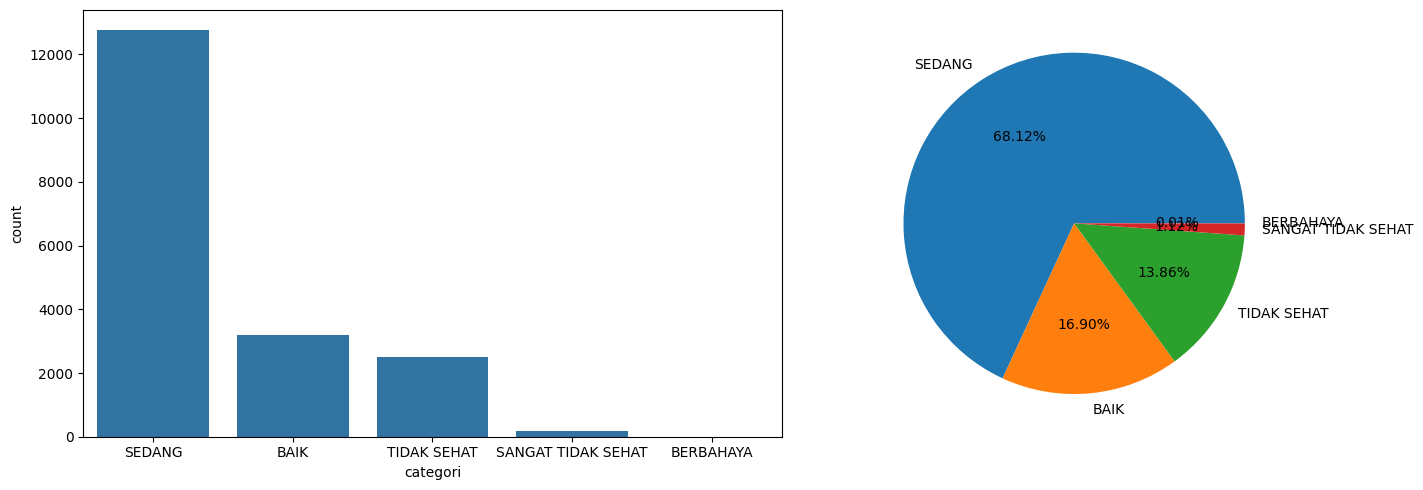

In [27]:
# Menentukan target kolom yang ingin dianalisis
target = "categori"

# Menghitung jumlah nilai unik dalam kolom target
val_counts = df[target].value_counts()

# Menampilkan nilai unik beserta jumlahnya
print(val_counts, "\n\n")

# Membuat plot untuk visualisasi jumlah data dalam kolom target
plt.figure(figsize=(15, 5))  # Mengatur ukuran gambar plot
plt.subplot(1, 2, 1)  # Membuat subplot pertama dalam grid 1x2
sns.countplot(x=data[target])  # Membuat plot countplot menggunakan library seaborn

plt.subplot(1, 2, 2)  # Membuat subplot kedua dalam grid 1x2
plt.pie(val_counts, labels=val_counts.keys(), autopct="%.2f%%")  # Membuat plot pie chart dengan label dan persentase

plt.tight_layout()  # Menyesuaikan layout plot agar terlihat rapi
plt.show()  # Menampilkan plot

In [28]:
# Menampilkan beberapa baris pertama dari DataFrame df
df.head()

tanggal             stasiun  pm10  so2    co    o3   no2  max critical  \
0  2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0   73       CO   
1  2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0   33       O3   
2  2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0   27     PM10   
3  2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0   22     PM10   
4  2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0   25     PM10   

  categori  
0   SEDANG  
1     BAIK  
2     BAIK  
3     BAIK  
4     BAIK

In [29]:
# Menampilkan informasi rinci tentang DataFrame df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17281 entries, 0 to 17280
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   17281 non-null  object 
 1   stasiun   17281 non-null  object 
 2   pm10      17281 non-null  float64
 3   so2       17281 non-null  float64
 4   co        17281 non-null  float64
 5   o3        17281 non-null  float64
 6   no2       17281 non-null  float64
 7   max       17281 non-null  int64  
 8   critical  17281 non-null  object 
 9   categori  17281 non-null  object 
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


Transform Data

In [30]:
# Mengubah kolom 'tanggal' menjadi tipe data datetime dengan format tahun-bulan-tanggal (%Y-%m-%d)
df['tanggal'] = pd.to_datetime(df['tanggal'], format='%Y-%m-%d')

In [31]:
# Mengatur kolom 'tanggal' sebagai indeks (index) DataFrame df
df.set_index(['tanggal'], inplace=True)

In [32]:
# Menampilkan beberapa baris pertama dari DataFrame df setelah melakukan pengaturan kolom 'tanggal' sebagai indeks
df.head()

stasiun  pm10  so2    co    o3   no2  max critical  \
tanggal                                                                     
2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0   73       CO   
2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0   33       O3   
2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0   27     PM10   
2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0   22     PM10   
2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0   25     PM10   

           categori  
tanggal              
2010-01-01   SEDANG  
2010-01-02     BAIK  
2010-01-03     BAIK  
2010-01-04     BAIK  
2010-01-05     BAIK

In [33]:
# Mengetahui nilai minimum dan maksimum dari indeks (index) DataFrame df setelah pengaturan kolom 'tanggal' sebagai indeks
df.index.min(), df.index.max()

(Timestamp('2010-01-01 00:00:00'), Timestamp('2021-12-31 00:00:00'))

In [34]:
# Memeriksa apakah selisih antara nilai maksimum dan minimum dari indeks DataFrame df adalah 214
if (df.index.max() - df.index.min() == 214):
    print('Data is Continous')  # Jika selisihnya 214, maka mencetak pesan "Data is Continous"

## **Modelling**

### **Analisa Time Series**


<Axes: xlabel='tanggal'>

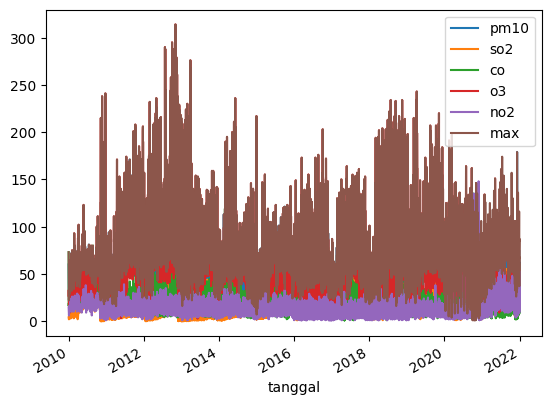

In [35]:
# Membuat plot dari DataFrame df
df.plot()

In [36]:
# Memecah DataFrame df menjadi dua bagian berdasarkan proporsi data train dan test (80% train, 20% test)
split = int(len(df) * 0.8)  # Menghitung titik pemisahan (80% data train, 20% data test)
train_df = df[:split]  # Memisahkan 80% data pertama sebagai data training
test_df = df[split:]  # Memisahkan 20% data terakhir sebagai data testing

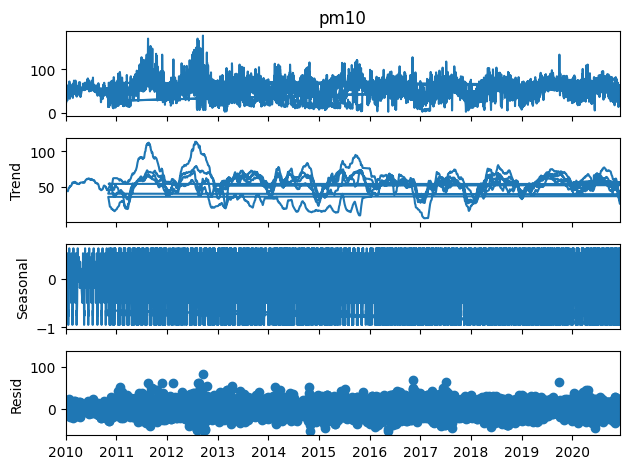

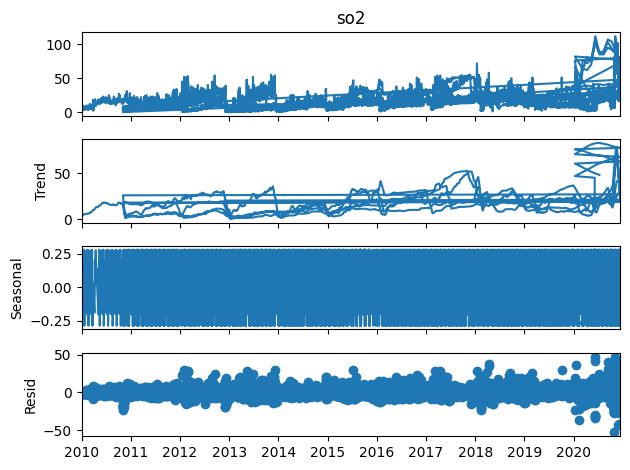

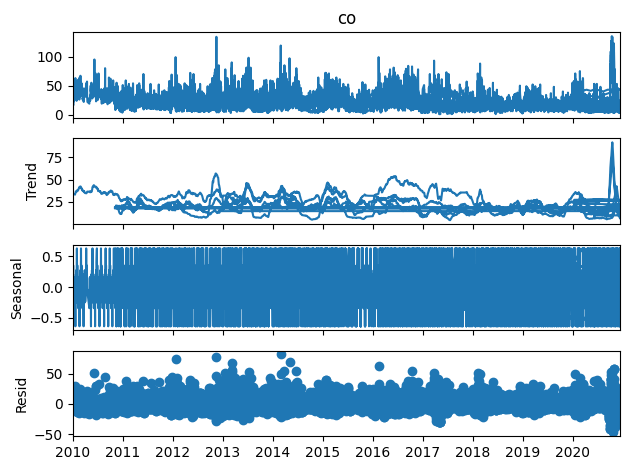

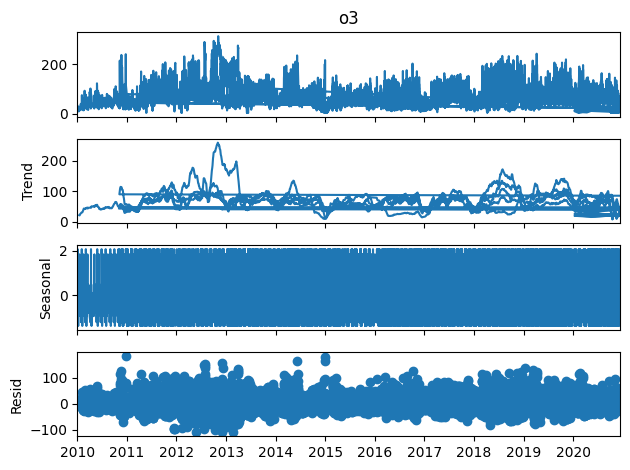

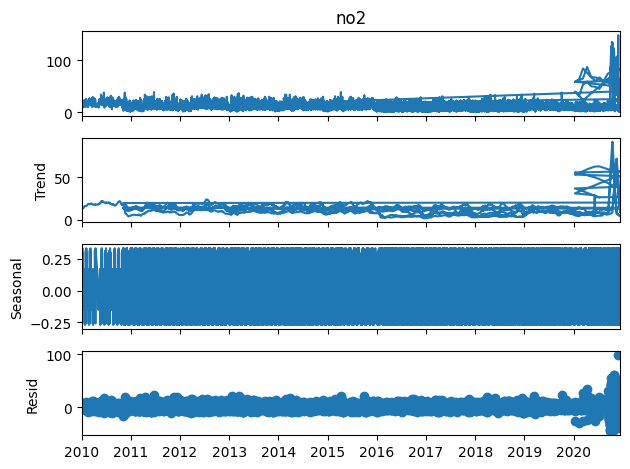

In [37]:
# Mendefinisikan daftar p yang berisi nama-nama kolom yang ingin didekomposisi
p = ['pm10', 'so2', 'co', 'o3', 'no2']

# Melakukan dekomposisi musiman untuk setiap kolom dalam daftar p
for i in p:
    decompose_add = seasonal_decompose(df[i], period=30)  # Melakukan dekomposisi musiman dengan periode 30 hari
    decompose_add.plot()  # Menampilkan plot dari hasil dekomposisi musiman

In [38]:
# Menguji stasioneritas dari beberapa kolom dalam suatu dataframe time series
def adf_test(ts):
    columns_to_test = ['pm10', 'so2', 'co', 'o3', 'no2']  # Kolom-kolom yang akan diuji stasioneritasnya
    for column in columns_to_test:
        result = adfuller(ts[column])  # Melakukan uji Augmented Dickey-Fuller (ADF) pada setiap kolom
        print(f'ADF Statistic for {column}: {result[0]}')  # Menampilkan nilai ADF Statistic
        print(f'p-value for {column}: {result[1]}')  # Menampilkan nilai p-value
        print('Critical Values:')
        for key, value in result[4].items():  # Menampilkan nilai Critical Values
            print(f'   {key}: {value}')
        print('\n')

# Memanggil fungsi adf_test untuk DataFrame df
adf_test(df)

ADF Statistic for pm10: -9.858819533423409
p-value for pm10: 4.2873305568578933e-17
Critical Values:
   1%: -3.4307290803453947
   5%: -2.861707538720287
   10%: -2.5668591765381246


ADF Statistic for so2: -7.708875296022685
p-value for so2: 1.2796407268426724e-11
Critical Values:
   1%: -3.4307292122419986
   5%: -2.8617075970097163
   10%: -2.5668592075647303


ADF Statistic for co: -9.33306400449726
p-value for co: 9.21711611523224e-16
Critical Values:
   1%: -3.430729454290974
   5%: -2.86170770397908
   10%: -2.56685926450295


ADF Statistic for o3: -8.244734500839444
p-value for o3: 5.59355975442332e-13
Critical Values:
   1%: -3.430729410259089
   5%: -2.8617076845199496
   10%: -2.566859254145141


ADF Statistic for no2: -12.155827109375156
p-value for no2: 1.5329324475124404e-22
Critical Values:
   1%: -3.430729454290974
   5%: -2.86170770397908
   10%: -2.56685926450295




 stasioner memiliki arti bahwa sifat statistik data tidak berubah seiring waktu

In [39]:
# Menghitung selisih (differencing) antara nilai pada beberapa kolom dalam DataFrame df
diff_df = df[p].diff()

# Menampilkan beberapa baris pertama dari DataFrame hasil differencing
diff_df.head()

pm10  so2    co    o3  no2
tanggal                               
2010-01-01   NaN  NaN   NaN   NaN  NaN
2010-01-02 -28.0 -2.0 -57.0   6.0 -5.0
2010-01-03  -5.0  0.0   3.0 -13.0  0.0
2010-01-04  -5.0  0.0  -3.0  -5.0 -3.0
2010-01-05   3.0  0.0   1.0   0.0  2.0

In [40]:
# Menghapus baris dengan nilai NaN (kosong) dari DataFrame diff_df
diff_df.dropna(inplace=True)

<Axes: xlabel='tanggal'>

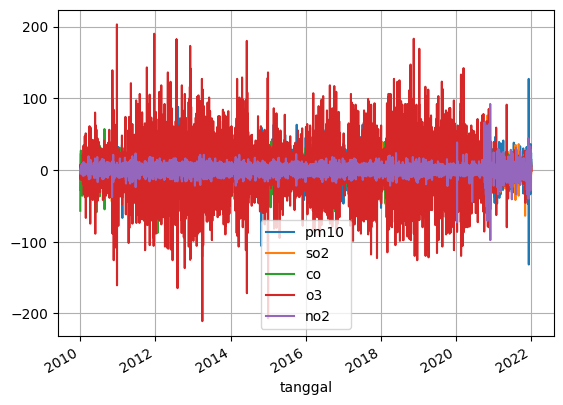

In [41]:
# Menampilkan plot dari DataFrame diff_df dengan grid
diff_df.plot(grid=True)

In [42]:
# Menggunakan fungsi adf_test untuk menguji stasioneritas dari DataFrame diff_df setelah proses differencing
adf_test(diff_df)

ADF Statistic for pm10: -29.71588842193893
p-value for pm10: 0.0
Critical Values:
   1%: -3.430729322225968
   5%: -2.861707645615233
   10%: -2.566859233436732


ADF Statistic for so2: -25.691381386249166
p-value for so2: 0.0
Critical Values:
   1%: -3.4307294763107494
   5%: -2.861707713710339
   10%: -2.566859269682756


ADF Statistic for co: -27.520709222715283
p-value for co: 0.0
Critical Values:
   1%: -3.4307294763107494
   5%: -2.861707713710339
   10%: -2.566859269682756


ADF Statistic for o3: -28.24547148081592
p-value for o3: 0.0
Critical Values:
   1%: -3.430729410259089
   5%: -2.8617076845199496
   10%: -2.566859254145141


ADF Statistic for no2: -31.59999619491
p-value for no2: 0.0
Critical Values:
   1%: -3.4307293442304183
   5%: -2.86170765533972
   10%: -2.5668592386129334




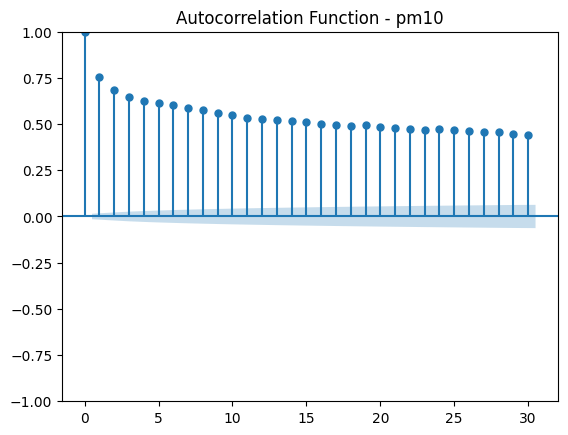

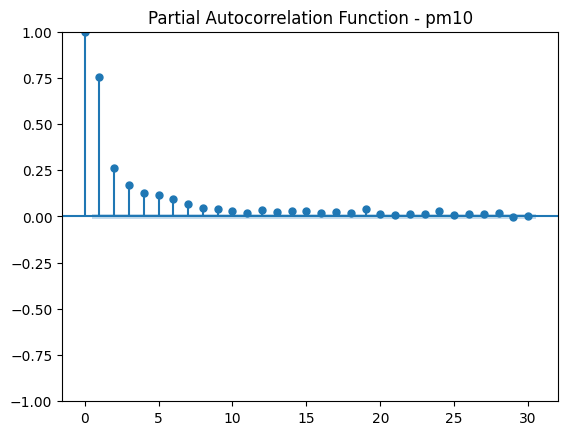

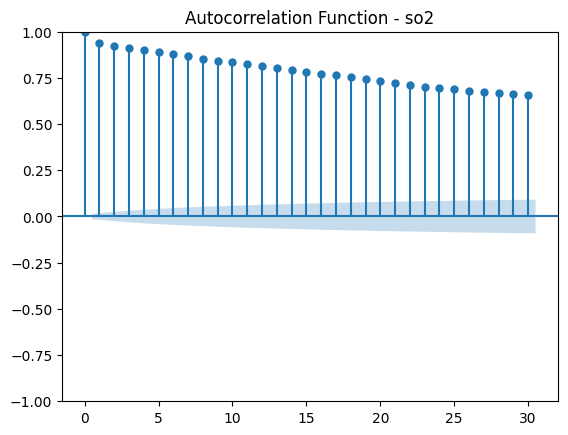

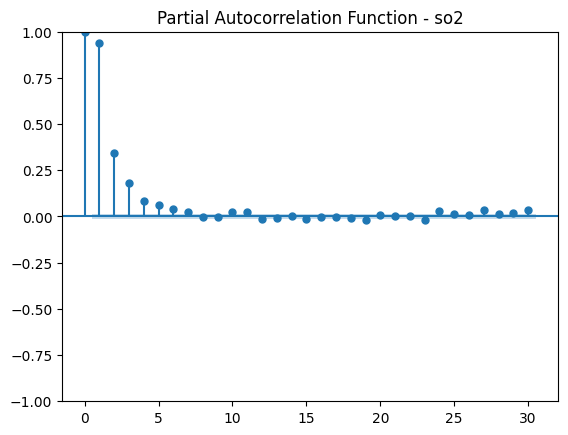

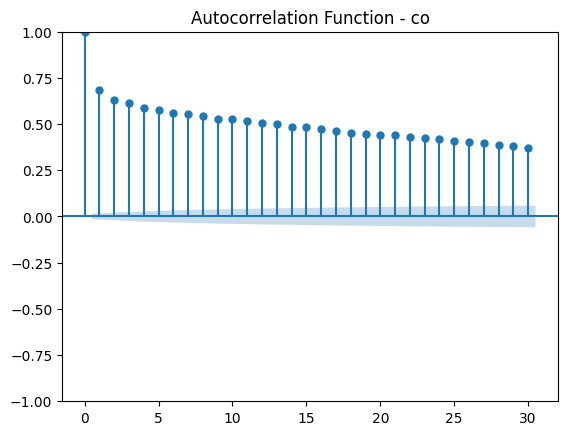

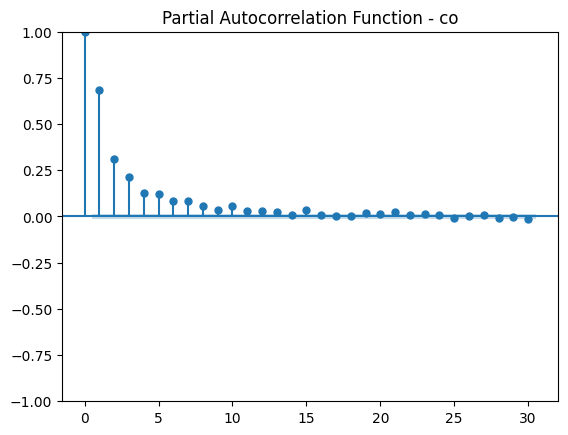

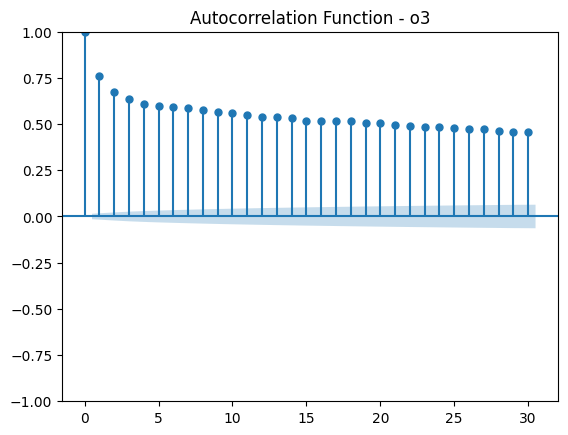

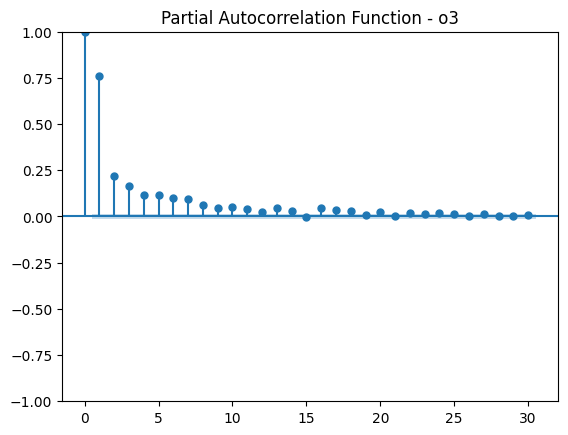

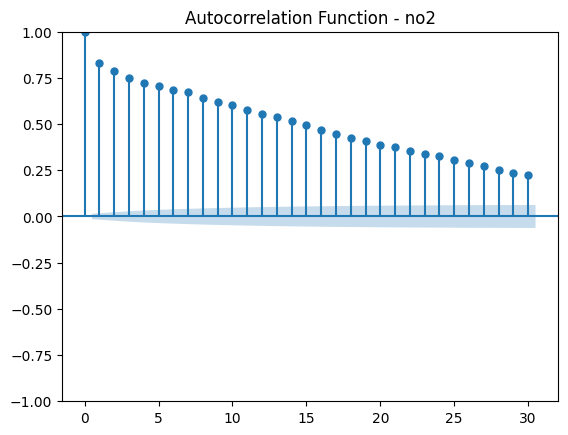

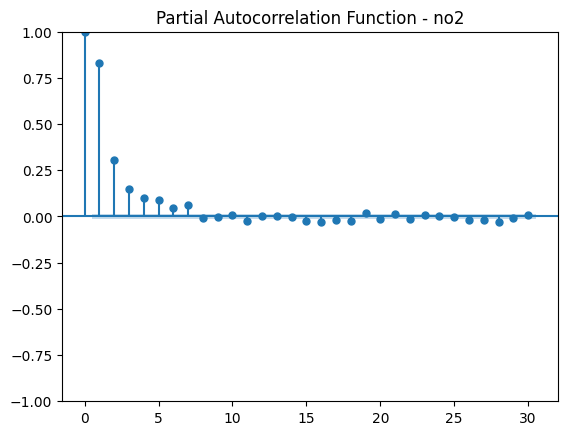

In [43]:
# Looping melalui setiap kolom dalam daftar p
for i in p:
    # Menampilkan plot Autocorrelation Function (ACF) untuk kolom i dengan lag maksimal 30
    plot_acf(df[i], lags=30, title=f'Autocorrelation Function - {i}')
    plt.show()  # Menampilkan plot ACF

    # Menampilkan plot Partial Autocorrelation Function (PACF) untuk kolom i dengan lag maksimal 30
    plot_pacf(df[i], lags=30, title=f'Partial Autocorrelation Function - {i}')
    plt.show()  # Menampilkan plot PACF

In [44]:
df_train = train_df.loc[train_df['stasiun'] == 'DKI1 (Bunderan HI)']
df_test = test_df.loc[test_df['stasiun'] == 'DKI1 (Bunderan HI)']

In [45]:
df_train

stasiun  pm10   so2    co    o3   no2  max critical  \
tanggal                                                                      
2010-01-01  DKI1 (Bunderan HI)  60.0   4.0  73.0  27.0  14.0   73       CO   
2010-01-02  DKI1 (Bunderan HI)  32.0   2.0  16.0  33.0   9.0   33       O3   
2010-01-03  DKI1 (Bunderan HI)  27.0   2.0  19.0  20.0   9.0   27     PM10   
2010-01-04  DKI1 (Bunderan HI)  22.0   2.0  16.0  15.0   6.0   22     PM10   
2010-01-05  DKI1 (Bunderan HI)  25.0   2.0  17.0  15.0   8.0   25     PM10   
...                        ...   ...   ...   ...   ...   ...  ...      ...   
2021-12-27  DKI1 (Bunderan HI)  52.0  61.0  15.0  20.0  15.0   71     PM25   
2021-12-28  DKI1 (Bunderan HI)  51.0  53.0  15.0  18.0  13.0   65     PM25   
2021-12-29  DKI1 (Bunderan HI)  31.0  54.0  10.0  24.0  11.0   54      SO2   
2021-12-30  DKI1 (Bunderan HI)  55.0  53.0  16.0  23.0  14.0   71     PM25   
2021-12-31  DKI1 (Bunderan HI)  62.0  52.0  23.0  20.0  14.0   85     PM25   

           categori  
tanggal              
2010-01-01   SEDANG  
2010-01-02     BAIK  
2010-01-03     BAIK  
2010-01-04     BAIK  
2010-01-05     BAIK  
...             ...  
2021-12-27   SEDANG  
2021-12-28   SEDANG  
2021-12-29   SEDANG  
2021-12-30   SEDANG  
2021-12-31   SEDANG  

[3950 rows x 9 columns]

In [46]:
df_test

stasiun  pm10    so2    co    o3   no2  max critical  \
tanggal                                                                       
2020-06-06  DKI1 (Bunderan HI)  55.0   16.0   5.0  65.0   9.0   65       O3   
2020-06-06  DKI1 (Bunderan HI)  59.0   15.0   5.0  33.0  10.0   59     PM10   
2020-06-06  DKI1 (Bunderan HI)  58.0   14.0   6.0  41.0  12.0   58     PM10   
2020-06-06  DKI1 (Bunderan HI)  67.0   16.0  10.0  34.0  10.0   67     PM10   
2020-06-06  DKI1 (Bunderan HI)  63.0   16.0   6.0  40.0  10.0   63     PM10   
2020-06-06  DKI1 (Bunderan HI)  49.0   15.0   6.0  58.0  13.0   58       O3   
2020-06-06  DKI1 (Bunderan HI)  60.0   16.0   6.0  61.0  10.0   61       O3   
2020-06-06  DKI1 (Bunderan HI)  60.0   15.0   6.0  61.0  12.0   61       O3   
2020-06-06  DKI1 (Bunderan HI)  70.0   13.0   8.0  54.0  13.0   70     PM10   
2020-06-06  DKI1 (Bunderan HI)  67.0   16.0   8.0  35.0  11.0   67     PM10   
2020-06-06  DKI1 (Bunderan HI)  56.0   15.0   5.0  49.0   8.0   56     PM10   
2020-06-06  DKI1 (Bunderan HI)  60.0   17.0   6.0  56.0   9.0   60     PM10   
2020-06-06  DKI1 (Bunderan HI)  57.0   15.0   6.0  47.0  11.0   57     PM10   
2020-06-06  DKI1 (Bunderan HI)  61.0   17.0  12.0  67.0  17.0   67       O3   
2020-06-06  DKI1 (Bunderan HI)  63.0   16.0   6.0  61.0  10.0   63     PM10   
2020-06-06  DKI1 (Bunderan HI)  67.0   20.0   6.0  34.0  11.0   67     PM10   
2020-06-06  DKI1 (Bunderan HI)  53.0   18.0   7.0  41.0  15.0   53     PM10   
2020-06-06  DKI1 (Bunderan HI)  53.0   15.0   7.0  77.0  11.0   77       O3   
2020-06-06  DKI1 (Bunderan HI)  76.0   19.0  13.0  64.0  23.0   76     PM10   
2020-06-06  DKI1 (Bunderan HI)  70.0   18.0  10.0  61.0  19.0   70     PM10   
2020-06-06  DKI1 (Bunderan HI)  65.0   20.0   6.0  42.0  14.0   65     PM10   
2020-06-06  DKI1 (Bunderan HI)  72.0   21.0   6.0  47.0  11.0   72     PM10   
2020-06-06  DKI1 (Bunderan HI)  68.0   20.0   5.0  57.0  11.0   68     PM10   
2020-06-06  DKI1 (Bunderan HI)  75.0   20.0   6.0  53.0  15.0   75     PM10   
2020-01-11  DKI1 (Bunderan HI)  49.0   67.0  18.0  10.0  40.0   11     PM25   
2020-02-11  DKI1 (Bunderan HI)  23.0   27.0  15.0   3.0  32.0    5       O3   
2020-03-11  DKI1 (Bunderan HI)  43.0   64.0  19.0   6.0  53.0   10     PM25   
2020-04-11  DKI1 (Bunderan HI)  42.0   62.0  20.0   5.0  59.0   12     PM25   
2020-05-11  DKI1 (Bunderan HI)  51.0   70.0  17.0  11.0  50.0   19     PM25   
2020-06-11  DKI1 (Bunderan HI)  79.0  106.0  23.0  13.0  49.0   20     PM25   
2020-07-11  DKI1 (Bunderan HI)  61.0   85.0  19.0  14.0  45.0   25     PM25   
2020-08-11  DKI1 (Bunderan HI)  60.0   85.0  16.0  17.0  57.0   14     PM25   
2020-09-11  DKI1 (Bunderan HI)  62.0   95.0  20.0  13.0  57.0   18     PM25   
2020-10-11  DKI1 (Bunderan HI)  62.0   92.0  18.0   8.0  53.0   16     PM25   
2020-12-11  DKI1 (Bunderan HI)  53.0   80.0  20.0   6.0  49.0   23     PM25   

               categori  
tanggal                  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-06-06       SEDANG  
2020-01-11       SEDANG  
2020-02-11         BAIK  
2020-03-11       SEDANG  
2020-04-11       SEDANG  
2020-05-11       SEDANG  
2020-06-11  TIDAK SEHAT  
2020-07-11       SEDANG  
2020-08-11       SEDANG  
2020-09-11       SEDANG  
2020-10-11       SEDANG  
2020-12-11       SEDANG

### **Single Exponential Smoothing**

len(single_exp_train_pred[pm10])=3950
len(single_exp_test_pred[pm10])=35


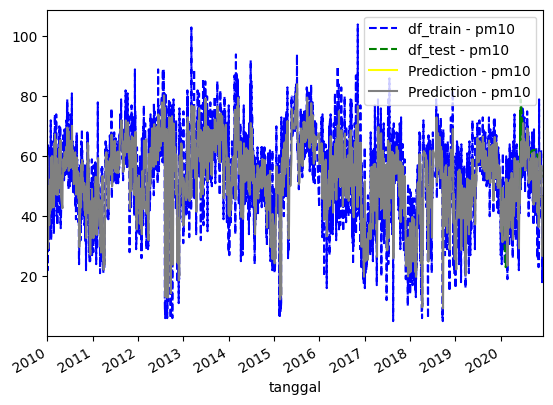

Train RMSE - pm10: 10.698804398751912
Test RMSE - pm10: 12.44107463953824
Train MAPE - pm10: 0.19617068777764837
Test MAPE - pm10: 0.18140073105084206
len(single_exp_train_pred[so2])=3950
len(single_exp_test_pred[so2])=35


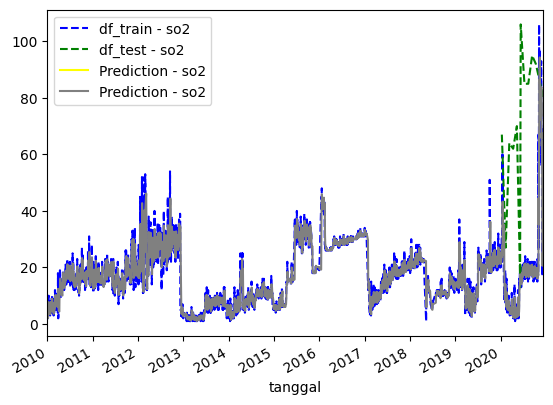

Train RMSE - so2: 3.7874585657357134
Test RMSE - so2: 34.45190099727069
Train MAPE - so2: 0.16889734867631204
Test MAPE - so2: 1.6247552023693632
len(single_exp_train_pred[co])=3950
len(single_exp_test_pred[co])=35


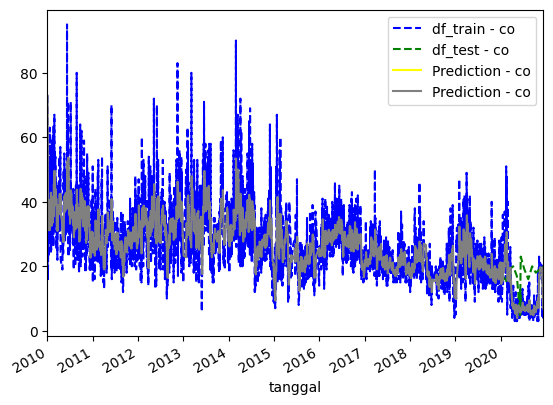

Train RMSE - co: 7.313139308217774
Test RMSE - co: 8.439437719187229
Train MAPE - co: 0.22310210180595672
Test MAPE - co: 1.1195071691487797
len(single_exp_train_pred[o3])=3950
len(single_exp_test_pred[o3])=35


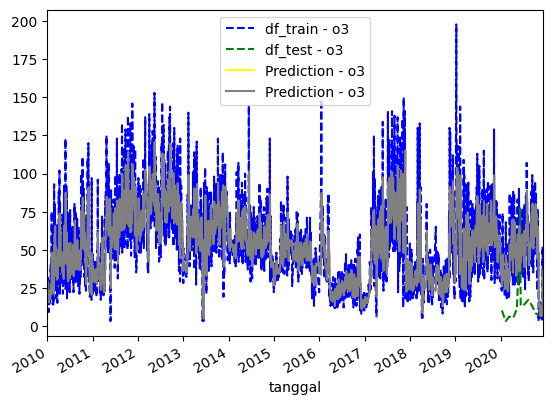

Train RMSE - o3: 17.247673062089195
Test RMSE - o3: 27.94258553459118
Train MAPE - o3: 0.2936987962126862
Test MAPE - o3: 0.9590101889385981
len(single_exp_train_pred[no2])=3950
len(single_exp_test_pred[no2])=35


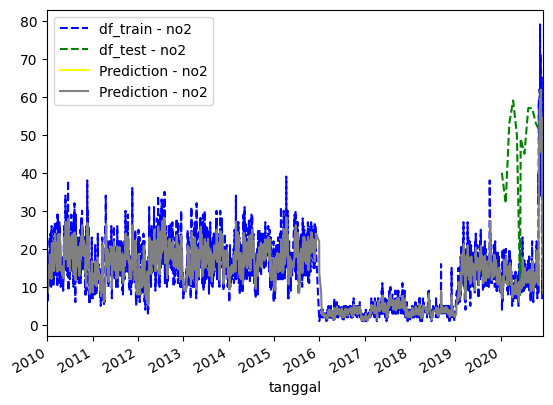

Train RMSE - no2: 4.448065048103829
Test RMSE - no2: 20.89785803404063
Train MAPE - no2: 0.2581239511534174
Test MAPE - no2: 0.40041760691295714


In [47]:
# Mendefinisikan dictionary untuk menyimpan model Simple Exponential Smoothing (SES) dan hasil prediksi
ses_model = {}
single_exp_train_pred = {}
single_exp_test_pred = {}

# Looping melalui setiap kolom dalam daftar p
for i in p:
    # Melatih model SES menggunakan data training untuk kolom i
    ses_model[i] = SimpleExpSmoothing(df_train[i]).fit()

    # Mendapatkan nilai prediksi untuk data training
    single_exp_train_pred[i] = ses_model[i].fittedvalues

    # Mendapatkan nilai prediksi untuk data testing (35 hari)
    single_exp_test_pred[i] = ses_model[i].forecast(35)

    # Menampilkan panjang prediksi untuk data training dan data testing
    print(f'len(single_exp_train_pred[{i}])={len(single_exp_train_pred[i])}')
    print(f'len(single_exp_test_pred[{i}])={len(single_exp_test_pred[i])}')

    # Plot data training, data testing, dan hasil prediksi SES
    df_train[i].plot(style='--', color='blue', legend=True, label=f'df_train - {i}')
    df_test[i].plot(style='--', color='green', legend=True, label=f'df_test - {i}')
    single_exp_test_pred[i].plot(color='yellow', legend=True, label=f'Prediction - {i}')
    single_exp_train_pred[i].plot(color='grey', legend=True, label=f'Prediction - {i}')
    plt.xlim('2010-01-01', '2020-12-11')  # Menentukan rentang sumbu x pada plot
    plt.show()  # Menampilkan plot

    # Menghitung Root Mean Squared Error (RMSE) untuk data training dan data testing
    print(f'Train RMSE - {i}:', mean_squared_error(df_train[i], single_exp_train_pred[i])**0.5)
    print(f'Test RMSE - {i}:', mean_squared_error(df_test[i], single_exp_test_pred[i])**0.5)

    # Menghitung Mean Absolute Percentage Error (MAPE) untuk data training dan data testing
    print(f'Train MAPE - {i}:', mean_absolute_percentage_error(df_train[i], single_exp_train_pred[i]))
    print(f'Test MAPE - {i}:', mean_absolute_percentage_error(df_test[i], single_exp_test_pred[i]))

### **Double Exponential Smoothing**

len(double_exp_train_pred[pm10])=3950
len(double_exp_test_pred[pm10])=35


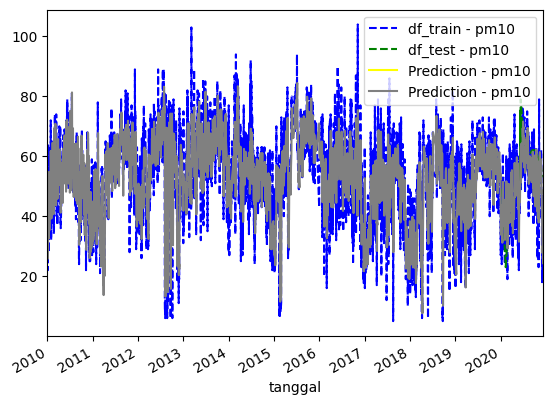

Train RMSE - pm10: 10.935808428335509
Test RMSE - pm10: 12.815416133877116
Train MAPE - pm10: 0.20307702893625046
Test MAPE - pm10: 0.17953690262497923
len(double_exp_train_pred[so2])=3950
len(double_exp_test_pred[so2])=35


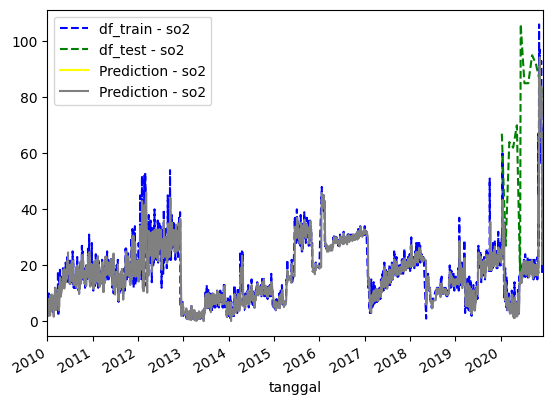

Train RMSE - so2: 3.8573800968778746
Test RMSE - so2: 34.55275670148197
Train MAPE - so2: 0.17837063838264045
Test MAPE - so2: 1.632092851524244
len(double_exp_train_pred[co])=3950
len(double_exp_test_pred[co])=35


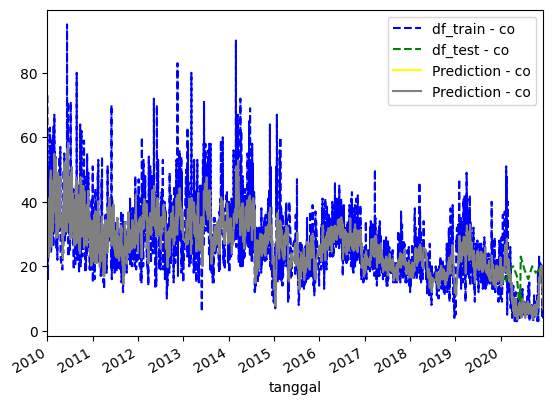

Train RMSE - co: 7.437473850548771
Test RMSE - co: 8.830036033120113
Train MAPE - co: 0.23322055578730763
Test MAPE - co: 1.167842663081436
len(double_exp_train_pred[o3])=3950
len(double_exp_test_pred[o3])=35


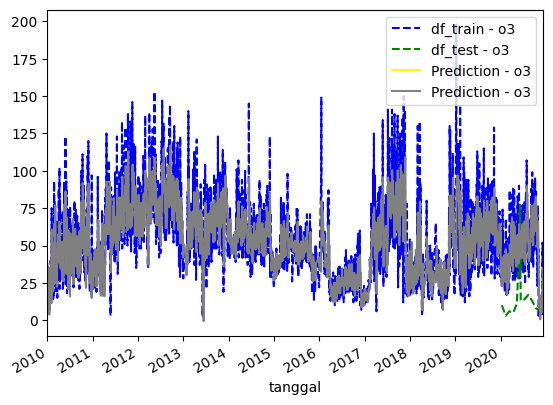

Train RMSE - o3: 17.747793726723632
Test RMSE - o3: 25.78885646663158
Train MAPE - o3: 0.31526323988126664
Test MAPE - o3: 0.9094601269958951
len(double_exp_train_pred[no2])=3950
len(double_exp_test_pred[no2])=35


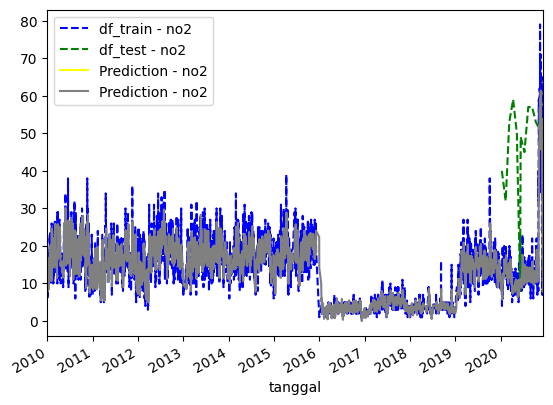

Train RMSE - no2: 4.567221818053822
Test RMSE - no2: 20.9720684516904
Train MAPE - no2: 0.2759917543207738
Test MAPE - no2: 0.4151408368140963


In [48]:

des_model = {}
double_exp_train_pred = {}
double_exp_test_pred = {}
for i in p:
  des_model[i] = double_exp = ExponentialSmoothing(df_train[i], trend=None, initialization_method='heuristic', seasonal='add', seasonal_periods=29, damped_trend=False).fit()
  double_exp_train_pred[i] = des_model[i].fittedvalues
  double_exp_test_pred[i] = des_model[i].forecast(35)
  print(f'len(double_exp_train_pred[{i}])={len(double_exp_train_pred[i])}')
  print(f'len(double_exp_test_pred[{i}])={len(double_exp_test_pred[i])}')
  df_train[i].plot(style='--', color='blue', legend=True, label=f'df_train - {i}')
  df_test[i].plot(style='--', color='green', legend=True, label=f'df_test - {i}')
  double_exp_test_pred[i].plot(color='yellow', legend=True, label=f'Prediction - {i}')
  double_exp_train_pred[i].plot(color='grey', legend=True, label=f'Prediction - {i}')
  plt.xlim('2010-01-01', '2020-12-11')
  plt.show()
  print(f'Train RMSE - {i}:',mean_squared_error(df_train[i], double_exp_train_pred[i])**0.5)
  print(f'Test RMSE - {i}:', mean_squared_error(df_test[i], double_exp_test_pred[i])**0.5)
  print(f'Train MAPE - {i}:', mean_absolute_percentage_error(df_train[i], double_exp_train_pred[i]))
  print(f'Test MAPE - {i}:', mean_absolute_percentage_error(df_test[i], double_exp_test_pred[i]))



### **SARIMA**

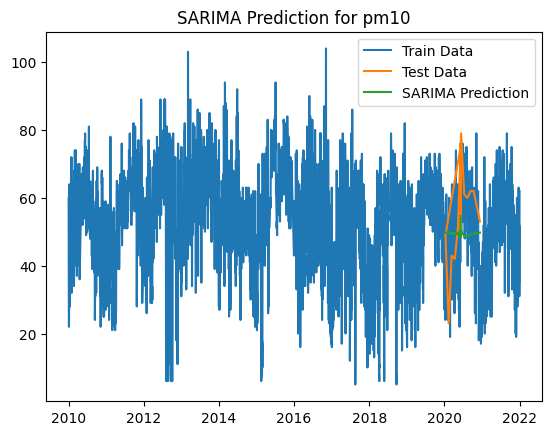

Train RMSE for pm10: 10.593881786776965
Test RMSE for pm10: 14.75404841654937
Train MAPE for pm10: 0.20282294681261648
Test MAPE for pm10: 0.21413363604704663


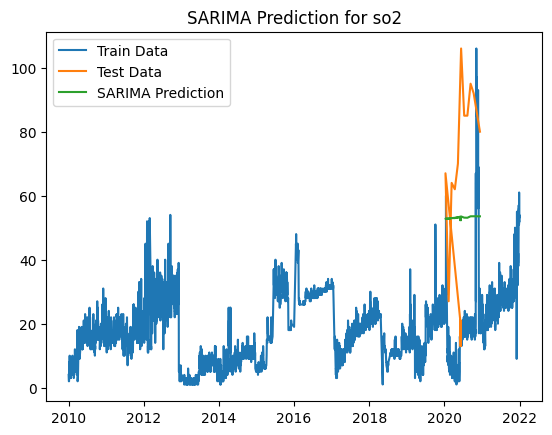

Train RMSE for so2: 3.7982170510903153
Test RMSE for so2: 34.3547182673992
Train MAPE for so2: 0.17414332691838175
Test MAPE for so2: 1.624655145121659


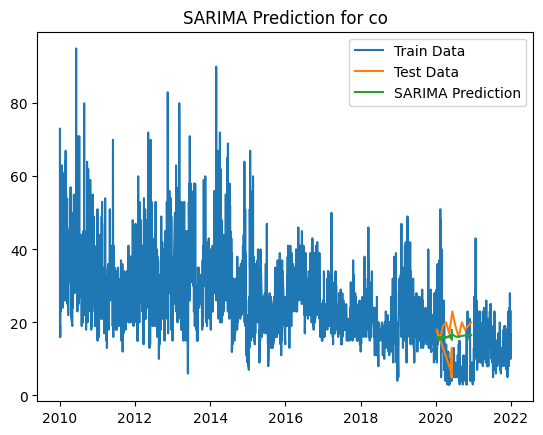

Train RMSE for co: 7.476950541763743
Test RMSE for co: 8.146755930569082
Train MAPE for co: 0.22572196322802815
Test MAPE for co: 1.0771276457448653


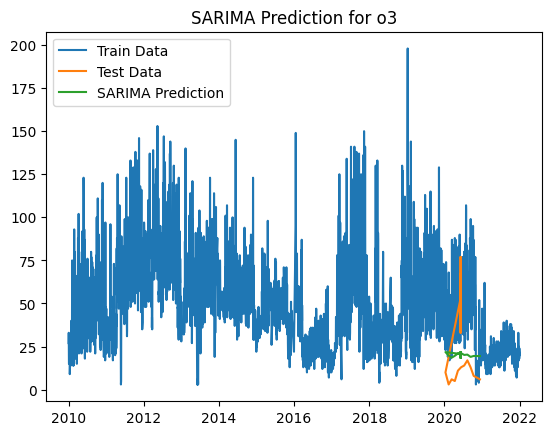

Train RMSE for o3: 16.580242205361575
Test RMSE for o3: 28.454245537398418
Train MAPE for o3: 0.30504118197605523
Test MAPE for o3: 0.920387427529321


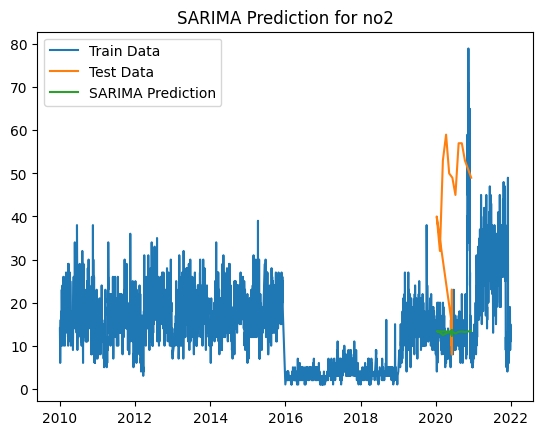

Train RMSE for no2: 4.407445779189821
Test RMSE for no2: 21.038075397871314
Train MAPE for no2: 0.25577768956267194
Test MAPE for no2: 0.3925562695799867


In [49]:
sarima_model = {}
sarima_train_pred = {}
sarima_test_pred = {}
for i in p:
    # Fitting SARIMA model
    sarima_model[i] = SARIMAX(df_train[i], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

    # Melakukan prediksi pada data pelatihan
    sarima_train_pred[i] = sarima_model[i].predict(start=df_train.index.min(), end=df_train.index.max(), dynamic=False)

    # Melakukan prediksi untuk data uji
    sarima_test_pred[i] = sarima_model[i].forecast(steps=len(df_test))

    # Memplot hasil prediksi
    plt.plot(df_train.index, df_train[i], label='Train Data')
    plt.plot(df_test.index, df_test[i], label='Test Data')
    plt.plot(df_test.index, sarima_test_pred[i], label='SARIMA Prediction')
    plt.title(f'SARIMA Prediction for {i}')
    plt.legend()
    plt.show()

    # Menghitung RMSE dan MAPE
    train_rmse = mean_squared_error(df_train[i], sarima_train_pred[i], squared=False)
    test_rmse = mean_squared_error(df_test[i], sarima_test_pred[i], squared=False)
    train_mape = mean_absolute_percentage_error(df_train[i], sarima_train_pred[i])
    test_mape = mean_absolute_percentage_error(df_test[i], sarima_test_pred[i])

    # Menampilkan hasil evaluasi
    print(f'Train RMSE for {i}: {train_rmse}')
    print(f'Test RMSE for {i}: {test_rmse}')
    print(f'Train MAPE for {i}: {train_mape}')
    print(f'Test MAPE for {i}: {test_mape}')


### **ARIMA**

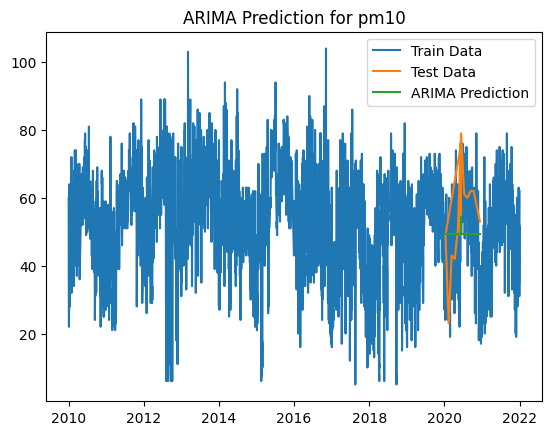

Train RMSE for pm10: 10.45316612924223
Test RMSE for pm10: 14.832003552368194
Train MAPE for pm10: 0.20039858604823182
Test MAPE for pm10: 0.21429082540951533


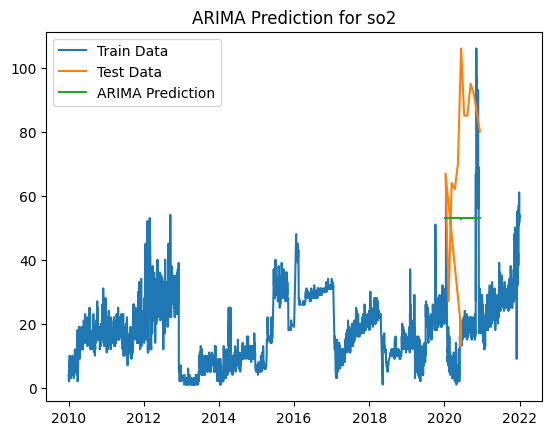

Train RMSE for so2: 3.7767713057901138
Test RMSE for so2: 34.537261316510325
Train MAPE for so2: 0.16790426602998024
Test MAPE for so2: 1.6313808797575158


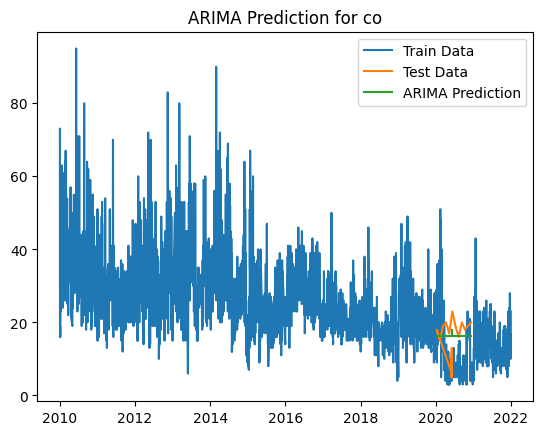

Train RMSE for co: 7.238682528265443
Test RMSE for co: 8.20403825834934
Train MAPE for co: 0.22183082493271686
Test MAPE for co: 1.0878538183121373


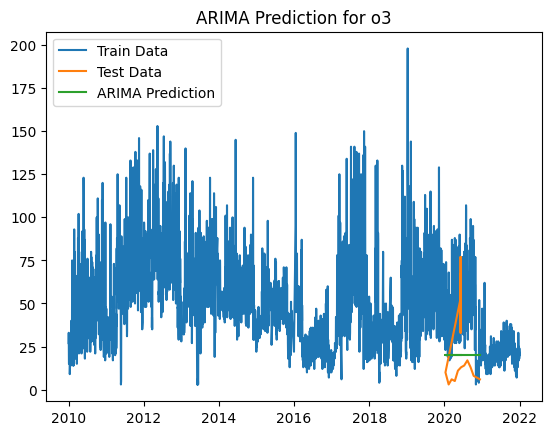

Train RMSE for o3: 16.449970024396034
Test RMSE for o3: 28.523142371701155
Train MAPE for o3: 0.29873316650685433
Test MAPE for o3: 0.9335936757562794


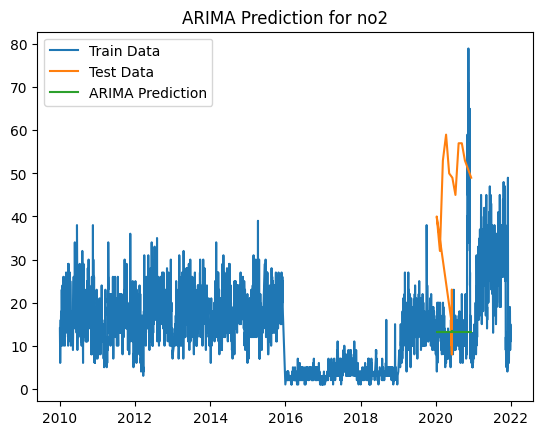

Train RMSE for no2: 4.366414770363902
Test RMSE for no2: 20.971690593004514
Train MAPE for no2: 0.25355940213549455
Test MAPE for no2: 0.39700892787089914


In [50]:
arima_model = {}
arima_train_pred = {}
arima_test_pred = {}
for i in p:
    # Fitting ARIMA model
    arima_model[i] = ARIMA(df_train[i], order=(1, 1, 1)).fit()

    # Melakukan prediksi pada data pelatihan
    arima_train_pred[i] = arima_model[i].predict(start=df_train.index.min(), end=df_train.index.max(), dynamic=False)

    # Melakukan prediksi untuk data uji
    arima_test_pred[i] = arima_model[i].forecast(steps=len(df_test))

    # Memplot hasil prediksi
    plt.plot(df_train.index, df_train[i], label='Train Data')
    plt.plot(df_test.index, df_test[i], label='Test Data')
    plt.plot(df_test.index, arima_test_pred[i], label='ARIMA Prediction')
    plt.title(f'ARIMA Prediction for {i}')
    plt.legend()
    plt.show()

    # Menghitung RMSE dan MAPE
    train_rmse = mean_squared_error(df_train[i], arima_train_pred[i], squared=False)
    test_rmse = mean_squared_error(df_test[i], arima_test_pred[i], squared=False)
    train_mape = mean_absolute_percentage_error(df_train[i], arima_train_pred[i])
    test_mape = mean_absolute_percentage_error(df_test[i], arima_test_pred[i])

    # Menampilkan hasil evaluasi
    print(f'Train RMSE for {i}: {train_rmse}')
    print(f'Test RMSE for {i}: {test_rmse}')
    print(f'Train MAPE for {i}: {train_mape}')
    print(f'Test MAPE for {i}: {test_mape}')


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptcsiy5sk/xnfn9oq3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptcsiy5sk/89xq5pty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16296', 'data', 'file=/tmp/tmptcsiy5sk/xnfn9oq3.json', 'init=/tmp/tmptcsiy5sk/89xq5pty.json', 'output', 'file=/tmp/tmptcsiy5sk/prophet_modeld9pcnc6i/prophet_model-20240601125354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:53:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:53:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


len(prophet_train_pred[pm10])=3950
len(prophet_test_pred[pm10])=35


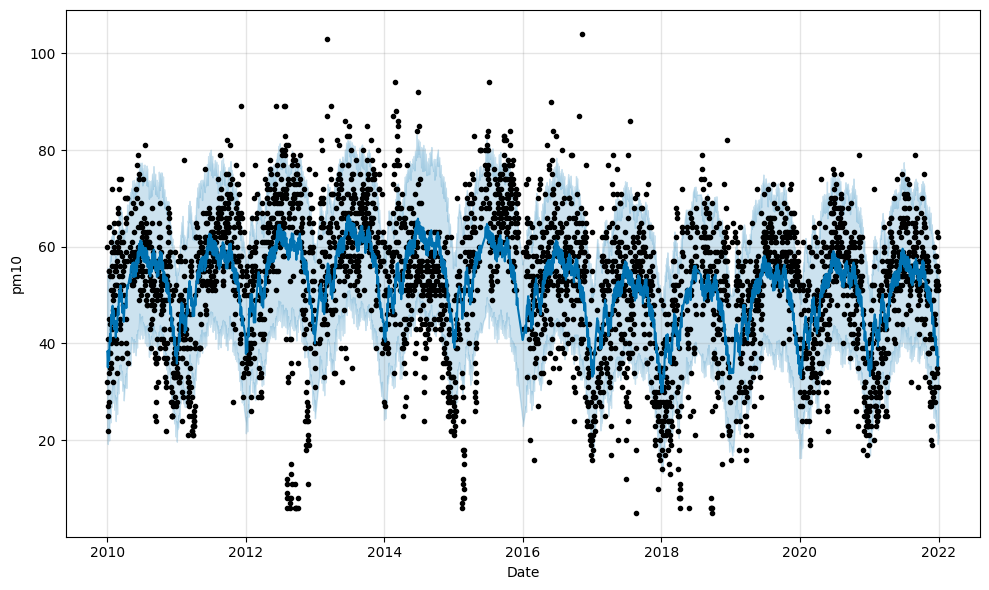

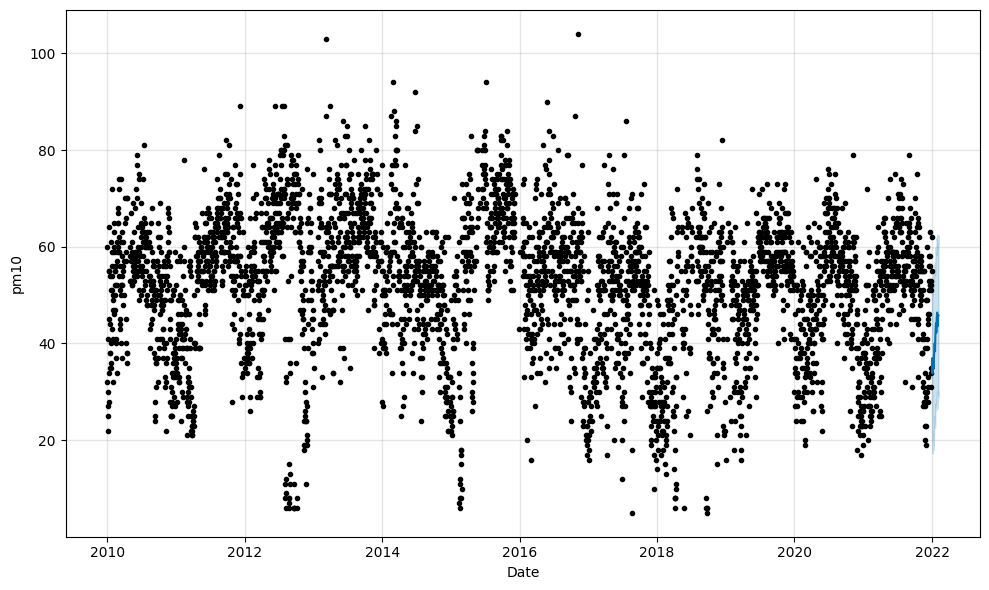

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptcsiy5sk/hqz7v994.json


Train RMSE - pm10: 12.60085105653136
Test RMSE - pm10: 22.36702331216297
Train MAPE - pm10: 0.2712047092444256
Test MAPE - pm10: 0.34278851568773216


DEBUG:cmdstanpy:input tempfile: /tmp/tmptcsiy5sk/8ocycy5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11994', 'data', 'file=/tmp/tmptcsiy5sk/hqz7v994.json', 'init=/tmp/tmptcsiy5sk/8ocycy5l.json', 'output', 'file=/tmp/tmptcsiy5sk/prophet_modelnu91nm_y/prophet_model-20240601125357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:53:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:53:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


len(prophet_train_pred[so2])=3950
len(prophet_test_pred[so2])=35


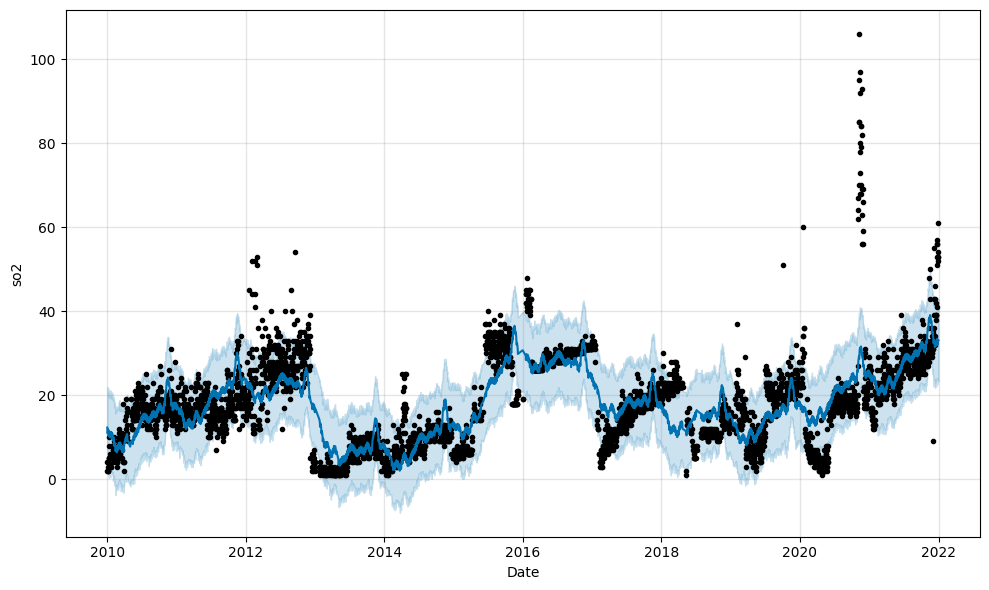

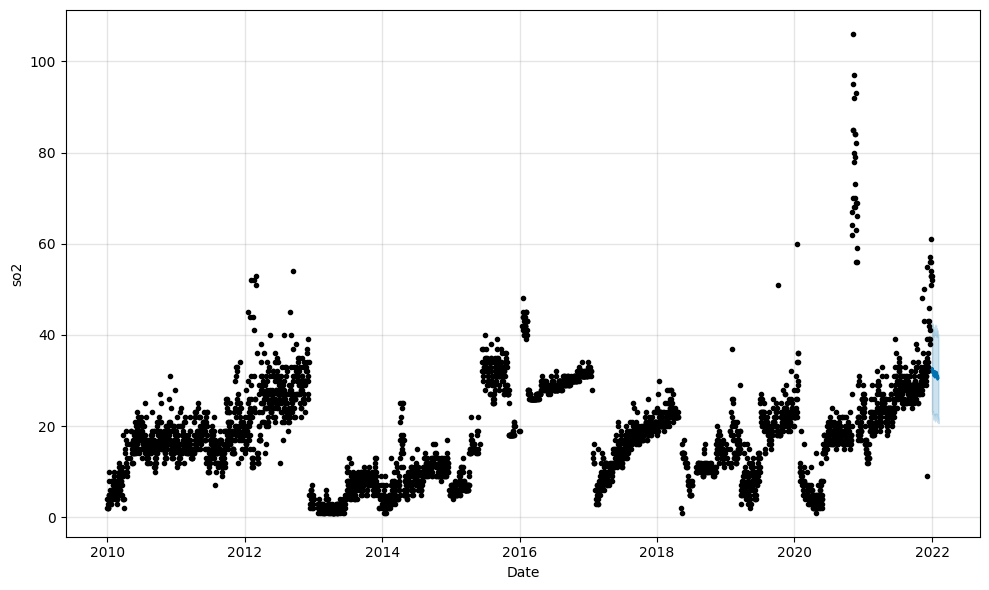

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptcsiy5sk/4dojo8c_.json


Train RMSE - so2: 7.372517062585692
Test RMSE - so2: 30.323474247094193
Train MAPE - so2: 0.497875747519631
Test MAPE - so2: 0.8102401283173428


DEBUG:cmdstanpy:input tempfile: /tmp/tmptcsiy5sk/g_4ya9es.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91523', 'data', 'file=/tmp/tmptcsiy5sk/4dojo8c_.json', 'init=/tmp/tmptcsiy5sk/g_4ya9es.json', 'output', 'file=/tmp/tmptcsiy5sk/prophet_modelcmtzupl8/prophet_model-20240601125401.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:54:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:54:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


len(prophet_train_pred[co])=3950
len(prophet_test_pred[co])=35


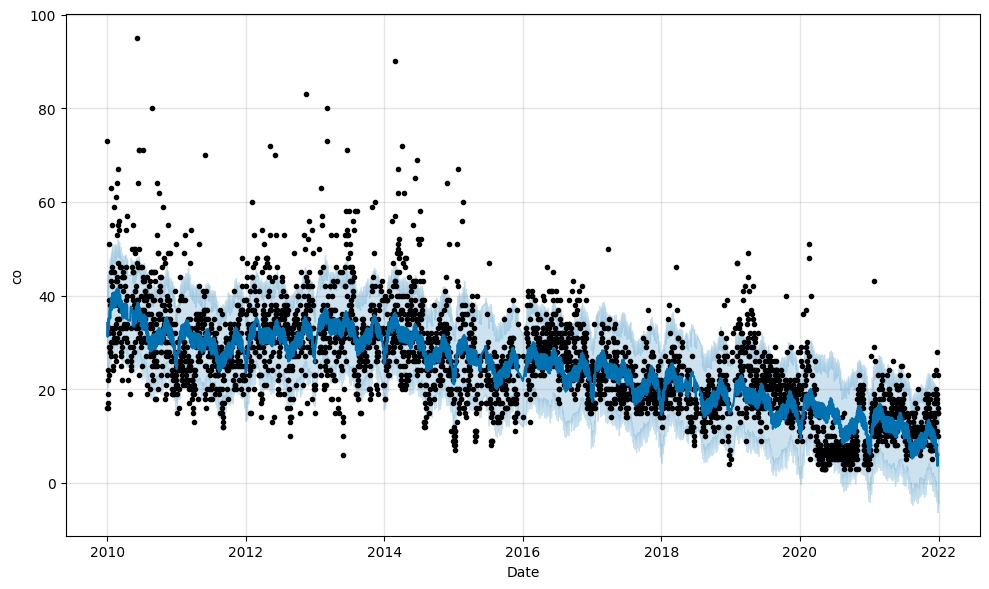

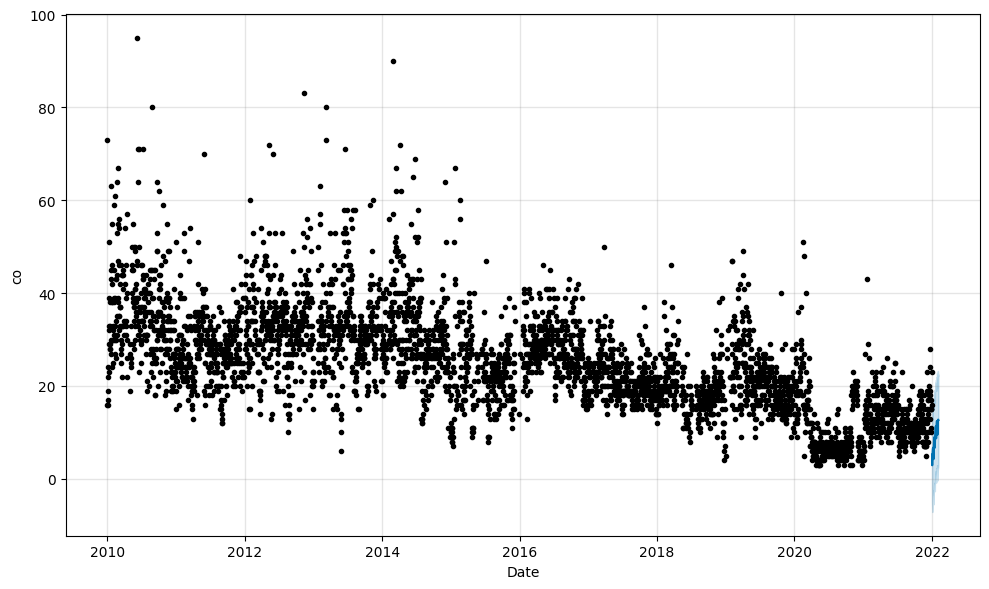

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptcsiy5sk/22x6sta_.json


Train RMSE - co: 7.780617315380386
Test RMSE - co: 4.626662886934242
Train MAPE - co: 0.30069451029451183
Test MAPE - co: 0.3519019211716781


DEBUG:cmdstanpy:input tempfile: /tmp/tmptcsiy5sk/qc2he_lm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44214', 'data', 'file=/tmp/tmptcsiy5sk/22x6sta_.json', 'init=/tmp/tmptcsiy5sk/qc2he_lm.json', 'output', 'file=/tmp/tmptcsiy5sk/prophet_modelysom5qoz/prophet_model-20240601125403.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:54:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:54:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


len(prophet_train_pred[o3])=3950
len(prophet_test_pred[o3])=35


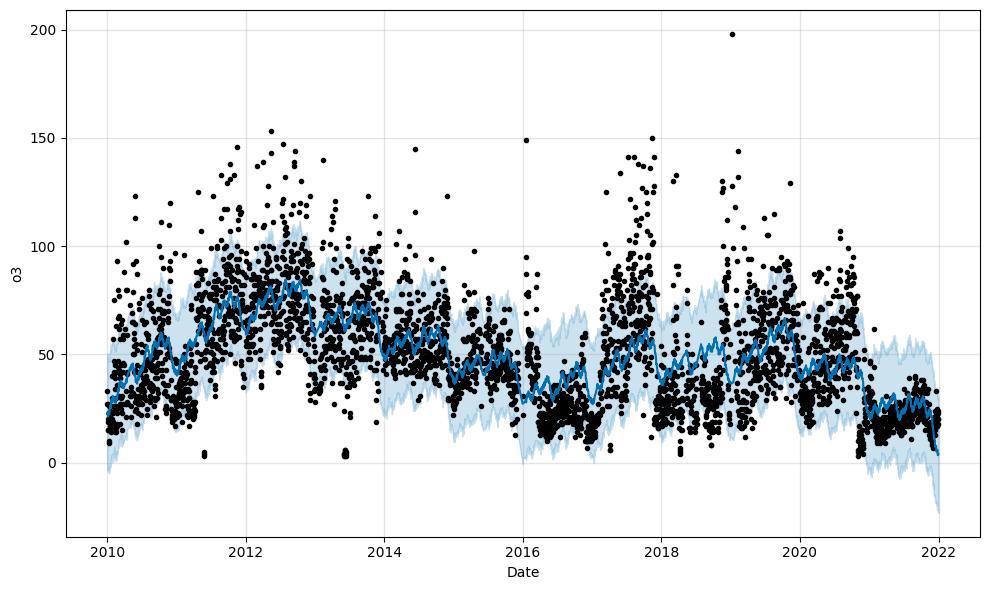

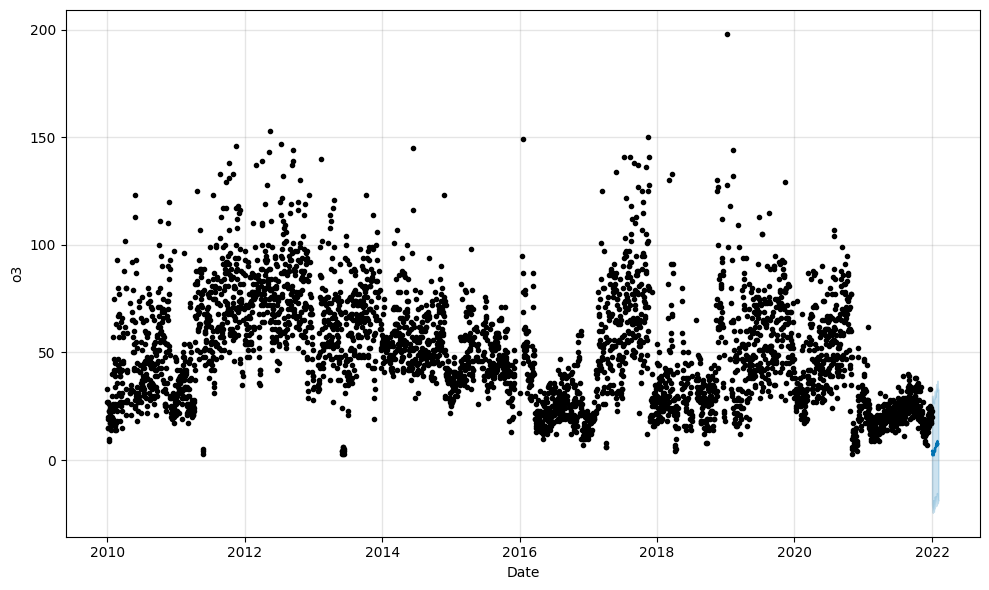

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptcsiy5sk/itt6xtdp.json


Train RMSE - o3: 20.21814249465061
Test RMSE - o3: 40.477138446251196
Train MAPE - o3: 0.4692012720147198
Test MAPE - o3: 0.7720415176808512


DEBUG:cmdstanpy:input tempfile: /tmp/tmptcsiy5sk/92welx6m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64685', 'data', 'file=/tmp/tmptcsiy5sk/itt6xtdp.json', 'init=/tmp/tmptcsiy5sk/92welx6m.json', 'output', 'file=/tmp/tmptcsiy5sk/prophet_modeli3h3ke18/prophet_model-20240601125407.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:54:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:54:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


len(prophet_train_pred[no2])=3950
len(prophet_test_pred[no2])=35


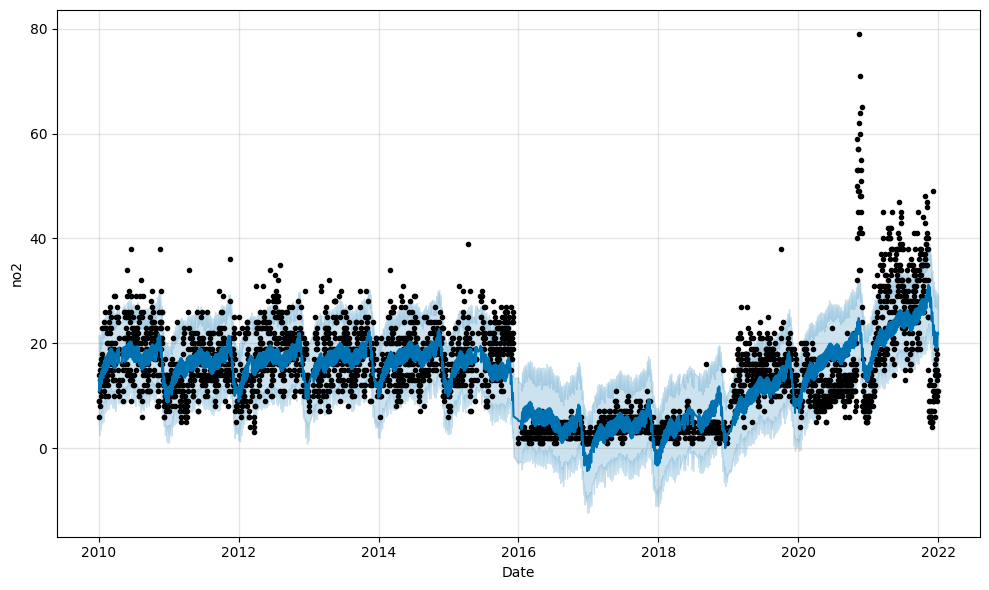

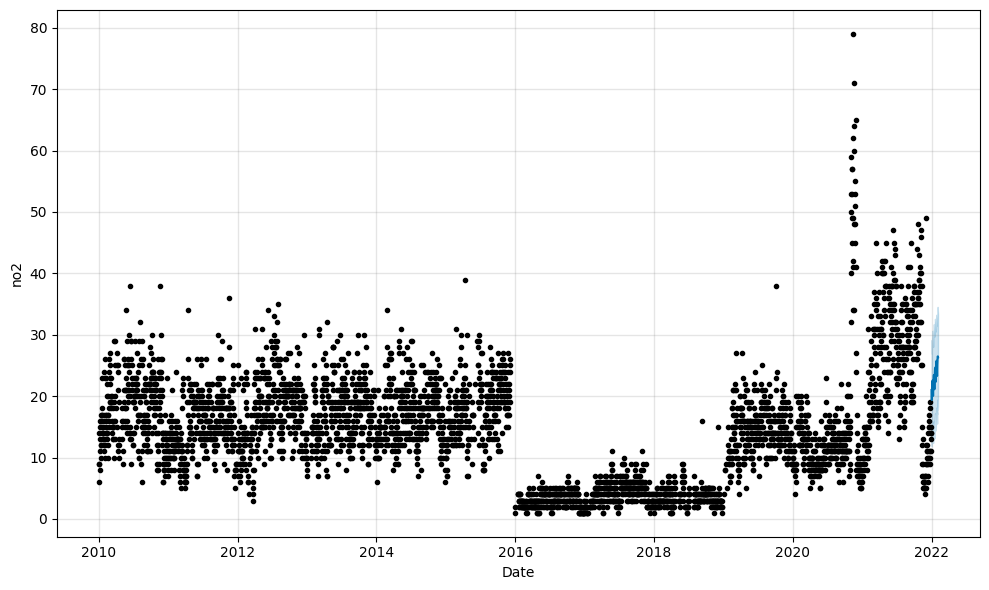

Train RMSE - no2: 6.014487627112737
Test RMSE - no2: 16.631367560105208
Train MAPE - no2: 0.47090330155064525
Test MAPE - no2: 0.7907360011644218


In [51]:
# Facebook Prophet
prophet_model = {}
prophet_train_pred = {}
prophet_test_pred = {}
for i in p:
  df_prophet = pd.DataFrame()
  df_prophet['ds'] = df_train.index
  df_prophet['y'] = df_train[i].values
  prophet_model[i] = Prophet()
  prophet_model[i].fit(df_prophet)
  future = prophet_model[i].make_future_dataframe(periods=35, freq='D')
  prophet_train_pred[i] = prophet_model[i].predict(df_prophet)
  prophet_test_pred[i] = prophet_model[i].predict(future.tail(35))
  print(f'len(prophet_train_pred[{i}])={len(prophet_train_pred[i])}')
  print(f'len(prophet_test_pred[{i}])={len(prophet_test_pred[i])}')
  prophet_model[i].plot(prophet_train_pred[i], xlabel='Date', ylabel=i)
  prophet_model[i].plot(prophet_test_pred[i], xlabel='Date', ylabel=i)
  plt.show()
  print(f'Train RMSE - {i}:',mean_squared_error(df_train[i], prophet_train_pred[i]['yhat'][:len(df_train)])**0.5)
  print(f'Test RMSE - {i}:', mean_squared_error(df_test[i], prophet_test_pred[i]['yhat'])**0.5)
  print(f'Train MAPE - {i}:', mean_absolute_percentage_error(df_train[i], prophet_train_pred[i]['yhat'][:len(df_train)]))
  print(f'Test MAPE - {i}:', mean_absolute_percentage_error(df_test[i], prophet_test_pred[i]['yhat']))

In [52]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Support Vector Machine
from sklearn.svm import SVC

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

# XGBoost
from xgboost import XGBClassifier
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Mengimpor library yang diperlukan untuk model LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam

### **LTSM**

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
import tensorflow.keras.callbacks as KC

In [54]:
# Data untuk LSTM
data_lstm = df_train['pm10'].values.reshape(-1, 1)

In [55]:
# Prapemrosesan data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_lstm)

In [56]:
# Fungsi untuk membuat dataset dengan time step
def create_dataset(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), 0])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

In [57]:
# Pembagian data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data_scaled, test_size=0.2)

In [58]:
# Time step dan pembuatan dataset
time_steps = 10
X_train, y_train = create_dataset(X_train, time_steps)
X_test, y_test = create_dataset(X_test, time_steps)

In [59]:
# Konfigurasi model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(1)
])

In [60]:
# Early stopping callback
early_stopping = KC.EarlyStopping(monitor='val_loss', patience=5)

# Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Pelatihan model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
99/99 [==============================] - 8s 20ms/step - loss: 0.0380 - val_loss: 0.0197
Epoch 2/50
99/99 [==============================] - 1s 10ms/step - loss: 0.0250 - val_loss: 0.0198
Epoch 3/50
99/99 [==============================] - 2s 17ms/step - loss: 0.0246 - val_loss: 0.0207
Epoch 4/50
99/99 [==============================] - 2s 19ms/step - loss: 0.0243 - val_loss: 0.0201
Epoch 5/50
99/99 [==============================] - 1s 10ms/step - loss: 0.0242 - val_loss: 0.0194
Epoch 6/50
99/99 [==============================] - 1s 7ms/step - loss: 0.0242 - val_loss: 0.0202
Epoch 7/50
99/99 [==============================] - 1s 8ms/step - loss: 0.0240 - val_loss: 0.0191
Epoch 8/50
99/99 [==============================] - 1s 7ms/step - loss: 0.0237 - val_loss: 0.0193
Epoch 9/50
99/99 [==============================] - 1s 7ms/step - loss: 0.0235 - val_loss: 0.0192
Epoch 10/50
99/99 [==============================] - 1s 7ms/step - loss: 0.0238 - val_loss: 0.0191
Epoch 11/50
99

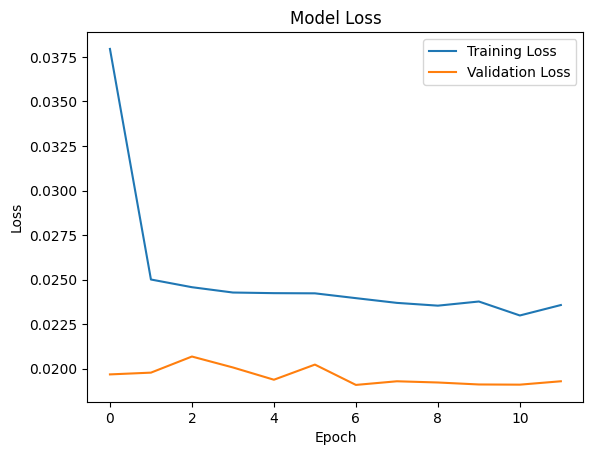

In [61]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

In [62]:
# Menggunakan model LSTM untuk membuat prediksi
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

25/25 [==============================] - 0s 4ms/step


In [63]:
# Mengembalikan data yang telah dinormalisasi ke dalam skala aslinya
train_pred = scaler.inverse_transform(train_pred)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1)).reshape(-1)

test_pred = scaler.inverse_transform(test_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

In [64]:
# Menampilkan performa model LSTM
train_rmse = mean_squared_error(y_train, train_pred, squared=False)
test_rmse = mean_squared_error(y_test, test_pred, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 14.856106071614043
Test RMSE: 13.750825224007006


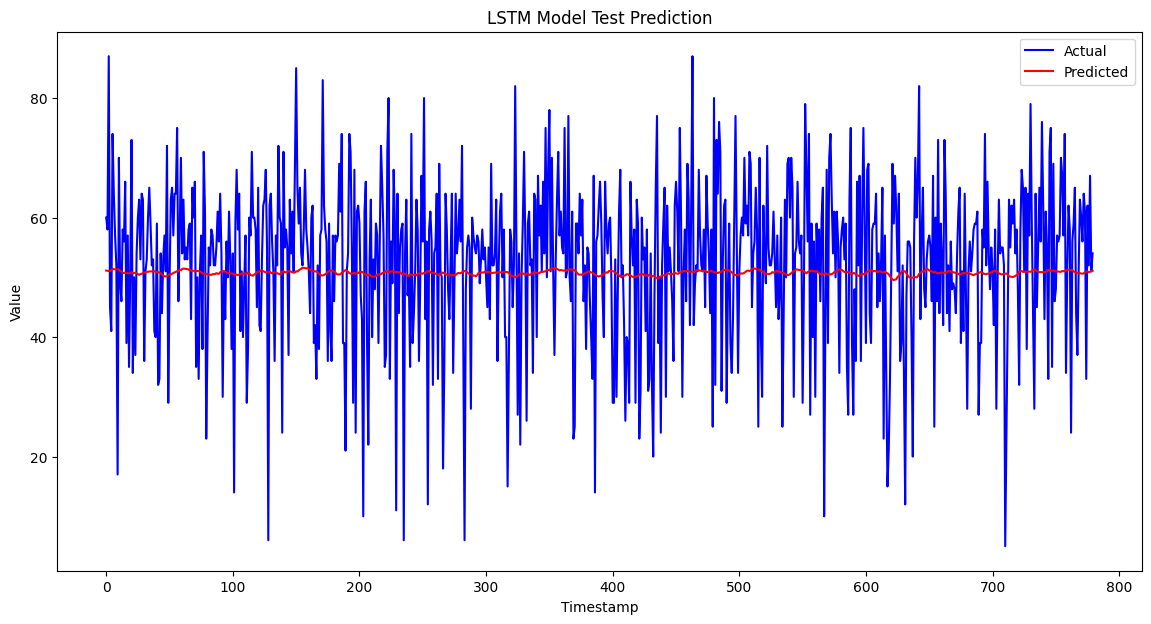

In [66]:
# Membuat timestamps berdasarkan panjang y_test
timestamps = np.arange(len(y_test))

# Mengonversi test_pred agar sesuai dengan panjang timestamps
test_pred = np.resize(test_pred, len(timestamps))

# Kemudian plot data
plt.figure(figsize=(14, 7))
plt.plot(timestamps, y_test, label='Actual', color='blue')
plt.plot(timestamps, test_pred, label='Predicted', color='red')
plt.title('LSTM Model Test Prediction')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()


### **NAIVE BAYES**

In [67]:
df = pd.read_csv('/content/data_AQ1.csv')

In [68]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [69]:
# Mengubah kategori menjadi one-hot encoding
X = pd.get_dummies(df.drop(columns=['categori', 'tanggal']))

# Mengubah label kategori menjadi bentuk numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['categori'])

In [70]:
# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Pastikan 'tanggal' diubah menjadi tipe data datetime
#df['tanggal'] = pd.to_datetime(df['tanggal'])

In [72]:
# Mengekstrak tahun, bulan, dan hari dari kolom tanggal
#df['tahun'] = df['tanggal'].dt.year
#df['bulan'] = df['tanggal'].dt.month
#df['hari'] = df['tanggal'].dt.day

In [73]:
# Membuat fitur dan label
#X = df.drop(columns=['categori', 'tanggal'])  # Menghapus kolom 'categori' dan 'tanggal' dari fitur
#y = df['categori']

In [74]:
# Melatih model Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X, y)

GaussianNB()

In [75]:
df.head()

tanggal             stasiun  pm10  so2    co    o3   no2  max critical  \
0  2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0   73       CO   
1  2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0   33       O3   
2  2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0   27     PM10   
3  2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0   22     PM10   
4  2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0   25     PM10   

  categori  
0   SEDANG  
1     BAIK  
2     BAIK  
3     BAIK  
4     BAIK

In [76]:
# Membuat prediksi menggunakan model
naive_bayes_train_pred = naive_bayes.predict(X_train)
naive_bayes_test_pred = naive_bayes.predict(X_test)

In [77]:
# Mengukur kinerja model
train_rmse_naive_bayes = mean_squared_error(y_train, naive_bayes_train_pred, squared=False)
test_rmse_naive_bayes = mean_squared_error(y_test, naive_bayes_test_pred, squared=False)

In [78]:
# Menampilkan hasil
print("Train RMSE Naive Bayes:", train_rmse_naive_bayes)
print("Test RMSE Naive Bayes:", test_rmse_naive_bayes)

Train RMSE Naive Bayes: 0.9835157552071755
Test RMSE Naive Bayes: 0.9684045370665351


### **Decision Tree**

In [93]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [94]:
df = pd.read_csv('/content/data_AQ1.csv')

In [95]:
# Menentukan fitur (X) dan label target (y)
X = df.drop(columns=['categori'])
y = df['categori']

In [96]:
# Mengonversi kolom tanggal menjadi numerik jika ada
if 'date' in X.columns:
    X['date'] = pd.to_datetime(X['date'])
    X['date'] = X['date'].map(pd.Timestamp.toordinal)

In [97]:
# Mengonversi label kategori menjadi numerik
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [98]:
# Mengonversi kolom kategori lainnya menjadi one-hot encoding jika ada
X = pd.get_dummies(X)

In [99]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Melatih model Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

decision_tree_train_pred = decision_tree.predict(X_train)
decision_tree_test_pred = decision_tree.predict(X_test)

In [101]:
train_rmse_decision_tree = mean_squared_error(y_train, decision_tree_train_pred, squared=False)
test_rmse_decision_tree = mean_squared_error(y_test, decision_tree_test_pred, squared=False)

In [102]:
print("Train RMSE Decision Tree:", train_rmse_decision_tree)
print("Test RMSE Decision Tree:", test_rmse_decision_tree)

Train RMSE Decision Tree: 0.0
Test RMSE Decision Tree: 0.05102365494737321


### **SVM**

In [103]:
# Melatih model Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)

SVC()

In [104]:
svm_train_pred = svm.predict(X_train)
svm_test_pred = svm.predict(X_test)

In [105]:
train_rmse_svm = mean_squared_error(y_train, svm_train_pred, squared=False)
test_rmse_svm = mean_squared_error(y_test, svm_test_pred, squared=False)

In [106]:
print("Train RMSE SVM:", train_rmse_svm)
print("Test RMSE SVM:", test_rmse_svm)

Train RMSE SVM: 0.3513984956965208
Test RMSE SVM: 0.3510387906935555


### **Logistic Regression**

In [107]:
# Melatih model Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [108]:
logistic_regression_train_pred = logistic_regression.predict(X_train)
logistic_regression_test_pred = logistic_regression.predict(X_test)

In [109]:
train_rmse_logistic_regression = mean_squared_error(y_train, logistic_regression_train_pred, squared=False)
test_rmse_logistic_regression = mean_squared_error(y_test, logistic_regression_test_pred, squared=False)

In [110]:
print("Train RMSE Logistic Regression:", train_rmse_logistic_regression)
print("Test RMSE Logistic Regression:", test_rmse_logistic_regression)

Train RMSE Logistic Regression: 0.9761700600362169
Test RMSE Logistic Regression: 1.0026000332776661


### **K-Nearest Neighbors**

In [111]:
# Melatih model K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [112]:
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

In [113]:
train_rmse_knn = mean_squared_error(y_train, knn_train_pred, squared=False)
test_rmse_knn = mean_squared_error(y_test, knn_test_pred, squared=False)

In [114]:
print("Train RMSE KNN:", train_rmse_knn)
print("Test RMSE KNN:", test_rmse_knn)

Train RMSE KNN: 0.2593729082914319
Test RMSE KNN: 0.359184626067325


### **XGBoost**

In [115]:
# Melatih model XGBoost
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [116]:
xgboost_train_pred = xgboost.predict(X_train)
xgboost_test_pred = xgboost.predict(X_test)

In [117]:
train_rmse_xgboost = mean_squared_error(y_train, xgboost_train_pred, squared=False)
test_rmse_xgboost = mean_squared_error(y_test, xgboost_test_pred, squared=False)

In [118]:
print("Train RMSE XGBoost:", train_rmse_xgboost)
print("Test RMSE XGBoost:", test_rmse_xgboost)

Train RMSE XGBoost: 0.0
Test RMSE XGBoost: 0.05102365494737321


### **AdaBoost**

In [119]:
# Melatih model AdaBoost
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [120]:
adaboost_train_pred = adaboost.predict(X_train)
adaboost_test_pred = adaboost.predict(X_test)

In [121]:
train_rmse_adaboost = mean_squared_error(y_train, adaboost_train_pred, squared=False)
test_rmse_adaboost = mean_squared_error(y_test, adaboost_test_pred, squared=False)

In [122]:
print("Train RMSE AdaBoost:", train_rmse_adaboost)
print("Test RMSE AdaBoost:", test_rmse_adaboost)

Train RMSE AdaBoost: 1.2776739843110154
Test RMSE AdaBoost: 1.3293378569727519


### **Random Forest**

In [123]:
# Melatih model Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [124]:
random_forest_train_pred = random_forest.predict(X_train)
random_forest_test_pred = random_forest.predict(X_test)

In [125]:
train_rmse_random_forest = mean_squared_error(y_train, random_forest_train_pred, squared=False)
test_rmse_random_forest = mean_squared_error(y_test, random_forest_test_pred, squared=False)

In [126]:
print("Train RMSE Random Forest:", train_rmse_random_forest)
print("Test RMSE Random Forest:", test_rmse_random_forest)

Train RMSE Random Forest: 0.0
Test RMSE Random Forest: 0.034015769964915475


In [127]:
# Mencari model dengan RMSE terendah pada data latih dan data uji
train_rmse_list = [train_rmse_naive_bayes, train_rmse_decision_tree, train_rmse_svm,
                   train_rmse_logistic_regression, train_rmse_knn, train_rmse_xgboost,
                   train_rmse_adaboost, train_rmse_random_forest, train_rmse]

test_rmse_list = [test_rmse_naive_bayes, test_rmse_decision_tree, test_rmse_svm,
                  test_rmse_logistic_regression, test_rmse_knn, test_rmse_xgboost,
                  test_rmse_adaboost, test_rmse_random_forest, test_rmse]

train_rmse_list_names = ["Naive Bayes", "Decision Tree", "SVM", "Logistic Regression",
                         "KNN", "XGBoost", "AdaBoost", "Random Forest", "LSTM"]

test_rmse_list_names = ["Naive Bayes", "Decision Tree", "SVM", "Logistic Regression",
                        "KNN", "XGBoost", "AdaBoost", "Random Forest", "LSTM"]

In [128]:
# Model dengan RMSE terendah pada data latih dan data uji
best_train_rmse = min(train_rmse_list)
best_train_rmse_model = train_rmse_list_names[train_rmse_list.index(best_train_rmse)]

best_test_rmse = min(test_rmse_list)
best_test_rmse_model = test_rmse_list_names[test_rmse_list.index(best_test_rmse)]

In [129]:
print("Best Train RMSE Model:", best_train_rmse_model)
print("Best Train RMSE:", best_train_rmse)

print("Best Test RMSE Model:", best_test_rmse_model)
print("Best Test RMSE:", best_test_rmse)

Best Train RMSE Model: Decision Tree
Best Train RMSE: 0.0
Best Test RMSE Model: Random Forest
Best Test RMSE: 0.034015769964915475


In [ ]:
import pickle

In [ ]:
filename = 'udara_model.sav'
pickle.dump(classifier, open(filename,'wb'))